# Demographics of Academy Awards Winners
![](Data/Oscars/dolby.jpg)

### To begin, we will be importing the libraries we will be using for this example:

* **pandas**: To provide high-performance, easy-to-use data structures and data analysis tools for the Python programming

* **numpy**: To add support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

* **matplotlib**: Plotting library for the Python programming language and its numerical mathematics extension NumPy.

#### We will be also using _%matplotlib inline_, to have the output of plotting commands displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials



In [3]:
# Authenticate and create the PyDrive client
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

#### Now we are ready to read the first file. As data is in csv format, we will be using the read_csv() function, which allows us to parse and load data into a dataframe (in memory) easily.

#### To see what we just read, we will be using the head() function. We can indicate the number of rows as a parameter, or by default it will show 5 rows.
####  

In [4]:

#id='1IYecdd6KegNcDM-Az6DtDPBCFeNpiw5D'
#downloaded = drive.CreateFile({'id': id})
#downloaded.GetContentFile('Oscars-demographics-DFE.csv')

In [5]:
# Load the Data and take a quick look.
oscars_demographics = pd.read_csv('Oscars-demographics-DFE.csv', encoding='latin-1')
oscars_demographics.tail()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
436,670946276,False,finalized,3,2/10/15 2:00,"London, England",1.0,7-Mar-71,1.0,White,...,Best Supporting Actress,http://www.nndb.com/people/309/000032213/,NaN,NaN,The Constant Gardener,Rachel Weisz,NaN,NaN,NaN,NaN
437,670946299,False,finalized,3,2/10/15 2:04,"Manchester, England",1.0,20-Oct-56,1.0,White,...,Best Director,http://www.nndb.com/people/887/000044755/,NaN,NaN,Slumdog Millionaire,Danny Boyle,NaN,NaN,NaN,NaN
438,670964912,False,finalized,3,2/10/15 2:03,"Chicago, Il",1.0,26-Jul-22,1.0,White,...,Best Supporting Actor,http://www.nndb.com/people/224/000032128/,NaN,NaN,All the President's Men,Jason Robards,NaN,NaN,NaN,NaN
439,670964956,False,finalized,3,2/10/15 2:01,"Laurel, Ne",1.0,31-Aug-28,1.0,White,...,Best Supporting Actor,http://www.nndb.com/people/764/000022698/,NaN,NaN,Affliction,James Coburn,NaN,NaN,NaN,NaN
440,670972898,False,finalized,3,2/10/15 2:01,"Nevada, Mo",1.0,5-Aug-06,1.0,White,...,Best Director,http://www.nndb.com/people/704/000024632/,NaN,NaN,The Treasure of the Sierra Madre,John Huston,NaN,NaN,NaN,NaN


In [6]:
oscars_short = pd.read_csv('Oscars-demographics-DFE.csv', encoding='latin-1',\
                usecols=['birthplace', 'date_of_birth', 'race_ethnicity', 'religion','sexual_orientation', 'year_of_award', 'award', 'movie', 'person'])
oscars_short.tail()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
436,"London, England",7-Mar-71,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz
437,"Manchester, England",20-Oct-56,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire,Danny Boyle
438,"Chicago, Il",26-Jul-22,White,Na,Straight,1977,Best Supporting Actor,All the President's Men,Jason Robards
439,"Laurel, Ne",31-Aug-28,White,Na,Straight,1999,Best Supporting Actor,Affliction,James Coburn
440,"Nevada, Mo",5-Aug-06,White,Na,Straight,1949,Best Director,The Treasure of the Sierra Madre,John Huston


In [7]:
# Information about the dataset
oscars_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   _last_judgment_at              416 non-null    object 
 5   birthplace                     441 non-null    object 
 6   birthplace:confidence          441 non-null    float64
 7   date_of_birth                  441 non-null    object 
 8   date_of_birth:confidence       441 non-null    float64
 9   race_ethnicity                 441 non-null    object 
 10  race_ethnicity:confidence      441 non-null    float64
 11  religion                       441 non-null    object 
 12  religion:confidence            441 non-null    flo

In [8]:
# Some stats about the numeric columns in our dataset
oscars_demographics.describe()

,_unit_id,_trusted_judgments,birthplace:confidence,date_of_birth:confidence,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,year_of_award_gold
count,4.410000e+02,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,11.000000
mean,6.704825e+08,7.637188,0.995259,0.996607,0.999130,0.989373,0.992390,1973.165533,0.990082,1977.363636
std,1.139974e+05,19.015541,0.038917,0.032060,0.016438,0.065610,0.049458,24.030895,0.059177,21.592928
min,6.704544e+08,3.000000,0.657100,0.656200,0.657100,0.333300,0.657100,1927.000000,0.333300,1942.000000
25%,6.704545e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1953.000000,1.000000,1964.000000
50%,6.704546e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1973.000000,1.000000,1977.000000
75%,6.704547e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1994.000000,1.000000,1997.000000
max,6.709729e+08,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,1.000000,2006.000000


### DataFrame structure

#### This is how a DataFrame is shown. We can see that both the column names and the index names are in bold. Columns and index provide labels to the columns and rows, which allow for direct and easy access to different subsets of data.

#### DataFrame data (values) is always in regular font and is an entirely separate component from the columns or index.

####  Each of the three DataFrame components: the index, columns, and data; may be accessed directly from a DataFrame. Each of these components is itself a Python object with its own unique attributes and methods.

#### Let´s see how to access each of them:
####     

In [9]:
oscars_index = oscars_demographics.index
oscars_columns = oscars_demographics.columns
oscars_data = oscars_demographics.values

In [10]:
oscars_index

RangeIndex(start=0, stop=441, step=1)

In [11]:
oscars_columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold'],
      dtype='object')

In [12]:
oscars_data

array([[670454353, False, 'finalized', ..., nan, nan, nan],
       [670454354, False, 'finalized', ..., nan, nan, nan],
       [670454355, False, 'finalized', ..., nan, nan, nan],
       ...,
       [670964912, False, 'finalized', ..., nan, nan, nan],
       [670964956, False, 'finalized', ..., nan, nan, nan],
       [670972898, False, 'finalized', ..., nan, nan, nan]], dtype=object)

In [13]:
type(oscars_index)

pandas.core.indexes.range.RangeIndex

In [14]:
type(oscars_columns)

pandas.core.indexes.base.Index

In [15]:
type(oscars_data)

numpy.ndarray

### Data Types

* _bool_: Boolean, stored in a single byte
* _int_: Integer, defaulted to 64bits, also available unsigned int
* _float_: Float, defaulted to 64bits
* _complex_: Complex, rarely seen in data analysis
* _object_: Object, typically a string, but is a catch-all for columns with multiple different types or other python objects
* _datetime64_: Datetime, specific moment in time
* _timedelta64_: Timedelta, amount of time
* _category_: Categorical, used for columns with a few possible values

#### We can use _dtype_ to display the data type associated with each column
##   

In [16]:
oscars_demographics.dtypes

_unit_id                           int64
_golden                             bool
_unit_state                       object
_trusted_judgments                 int64
_last_judgment_at                 object
birthplace                        object
birthplace:confidence            float64
date_of_birth                     object
date_of_birth:confidence         float64
race_ethnicity                    object
race_ethnicity:confidence        float64
religion                          object
religion:confidence              float64
sexual_orientation                object
sexual_orientation:confidence    float64
year_of_award                      int64
year_of_award:confidence         float64
award                             object
biourl                            object
birthplace_gold                   object
date_of_birth_gold                object
movie                             object
person                            object
race_ethnicity_gold               object
religion_gold   

In [17]:
#Using dtypes we saw the data types of each column. To see the quantity of columns with each data type we can use value_counts:
oscars_demographics.dtypes.value_counts()

object     16
float64     7
int64       3
bool        1
dtype: int64

### Series

  It is a __single dimension__ of data, composed of just an index and the data

  We can select a column using the __index operator__, or using the __dot notation__. 

###   

In [18]:
# We can indicate a column name, using the index operator:

oscars_demographics['person']

0      Lewis Milestone
1          Frank Lloyd
2      Lewis Milestone
3        Norman Taurog
4        Frank Borzage
            ...       
436       Rachel Weisz
437        Danny Boyle
438      Jason Robards
439       James Coburn
440        John Huston
Name: person, Length: 441, dtype: object

In [19]:
# We can also use the dot notation to indicate which column to select

oscars_demographics.person

0      Lewis Milestone
1          Frank Lloyd
2      Lewis Milestone
3        Norman Taurog
4        Frank Borzage
            ...       
436       Rachel Weisz
437        Danny Boyle
438      Jason Robards
439       James Coburn
440        John Huston
Name: person, Length: 441, dtype: object

### In this case, both outputs are the same, they are series. It has an index and data, the data type is the one from the column, in this case is object. 

Notice that this worked because the column name doesn´t include a blank. If the column was named business name instead of name, it whouldn´t have worked. 

Best practice is to use always the __index operator__, and avoid the use of the dot notation.
###    

In [20]:
#To verify the data type of the output:

type(oscars_demographics['person'])

pandas.core.series.Series

In [21]:
type(oscars_demographics['person'].to_frame())

pandas.core.frame.DataFrame

In [22]:
oscars_demographics['person'].to_frame().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   person  441 non-null    object
dtypes: object(1)
memory usage: 3.6+ KB


### Series Methods

#### We will start understanding what methods can be applied to a series, and some examples. Methods will depend on the data type.
### 

In [23]:
s_attr_methods = set(dir(pd.Series))
len(s_attr_methods)

433

In [24]:
s_attr_methods

{'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__

In [25]:
df_attr_methods = set(dir(pd.DataFrame))
len(df_attr_methods)

430

In [26]:
df_attr_methods

{'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_e

#### As an example, we will select columns with two different data types

In [27]:
#Selecting two columns with different data types:
oscars_movie = oscars_demographics['movie']
oscars_year = oscars_demographics['year_of_award']

In [28]:
oscars_movie.head()

0               Two Arabian Knights
1                   The Divine Lady
2    All Quiet on the Western Front
3                            Skippy
4                          Bad Girl
Name: movie, dtype: object

In [29]:
oscars_year.head()

0    1927
1    1930
2    1931
3    1932
4    1933
Name: year_of_award, dtype: int64

### Value_Counts()

This method is usefull to understand the distribution the data on the serie contains. It´s usually more useful in object series than in numeric series 

In [30]:
oscars_movie.value_counts()

Million Dollar Baby       5
Network                   4
West Side Story           4
The Deer Hunter           3
Mrs. Miniver              3
                         ..
Oridnary People           1
Syriana                   1
Cold Mountain             1
Dances with Wolves        1
Mr. Deeds Goes to Town    1
Name: movie, Length: 336, dtype: int64

We can also see the values normalized, which give us another perspective on the volume of occurency of each of the elemnts:


In [31]:
oscars_movie.value_counts(normalize=True)

Million Dollar Baby       0.011338
Network                   0.009070
West Side Story           0.009070
The Deer Hunter           0.006803
Mrs. Miniver              0.006803
                            ...   
Oridnary People           0.002268
Syriana                   0.002268
Cold Mountain             0.002268
Dances with Wolves        0.002268
Mr. Deeds Goes to Town    0.002268
Name: movie, Length: 336, dtype: float64

#### Although it is more useful in object series, it helps to understand values distribution in some numeric series:
####     

In [32]:
oscars_year.value_counts()

1969    8
2005    7
1961    7
1999    7
2009    7
       ..
1932    3
1931    3
1929    2
1933    1
1927    1
Name: year_of_award, Length: 87, dtype: int64

In [33]:
oscars_demographics['year_of_award'].value_counts()

1969    8
2005    7
1961    7
1999    7
2009    7
       ..
1932    3
1931    3
1929    2
1933    1
1927    1
Name: year_of_award, Length: 87, dtype: int64

#### Value_counts() return a series, where the value is the index, and the count associated to the value is the element.

#### Counting the number of elements in a serie: size, shape, len()

In [34]:
oscars_demographics.size

11907

In [35]:
oscars_demographics.shape

(441, 27)

In [36]:
len(oscars_demographics)

441

In [37]:
oscars_demographics.count()

_unit_id                         441
_golden                          441
_unit_state                      441
_trusted_judgments               441
_last_judgment_at                416
birthplace                       441
birthplace:confidence            441
date_of_birth                    441
date_of_birth:confidence         441
race_ethnicity                   441
race_ethnicity:confidence        441
religion                         441
religion:confidence              441
sexual_orientation               441
sexual_orientation:confidence    441
year_of_award                    441
year_of_award:confidence         441
award                            441
biourl                           441
birthplace_gold                    9
date_of_birth_gold                 8
movie                            441
person                           441
race_ethnicity_gold                2
religion_gold                     10
sexual_orientation_gold            3
year_of_award_gold                11
d

_size_, _len_ and _count_ return __scala__ values, but _shape_ returns a __one-item tuple__.

#### Difference between size, shape, len() and Count()

In [38]:
# Although size (shape and len) will still give us the number of elements:
oscars_demographics['date_of_birth_gold'].size

441

In [39]:
# Count will give us the number of elements with values:
oscars_demographics['date_of_birth_gold'].count()

8

In [40]:
# Because of this result, we know there are null values. To confirm this we can run isnull() which will return a serie of the same length as the original one, indicating True (if null) or false (if not)
oscars_demographics['date_of_birth_gold'].isnull()

0      True
1      True
2      True
3      True
4      True
       ... 
436    True
437    True
438    True
439    True
440    True
Name: date_of_birth_gold, Length: 441, dtype: bool

In [41]:
# We can also check if there are null values by using hasnans attribute:
oscars_demographics['date_of_birth_gold'].hasnans

True

In [42]:
# We need to take a decision on what to do with te null values. Sometimes we can ignore them, sometimes we can eliminate them, and others we can fill them using a specific value, or the previous or following value in the serie.

oscars_demographics.count()

_unit_id                         441
_golden                          441
_unit_state                      441
_trusted_judgments               441
_last_judgment_at                416
birthplace                       441
birthplace:confidence            441
date_of_birth                    441
date_of_birth:confidence         441
race_ethnicity                   441
race_ethnicity:confidence        441
religion                         441
religion:confidence              441
sexual_orientation               441
sexual_orientation:confidence    441
year_of_award                    441
year_of_award:confidence         441
award                            441
biourl                           441
birthplace_gold                    9
date_of_birth_gold                 8
movie                            441
person                           441
race_ethnicity_gold                2
religion_gold                     10
sexual_orientation_gold            3
year_of_award_gold                11
d

In [43]:
oscars_date_of_birth_gold = oscars_demographics['date_of_birth_gold']
oscars_date_of_birth_gold

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: date_of_birth_gold, Length: 441, dtype: object

In [44]:
# Filling Nan with a specific value:

oscars_date_of_birth_gold_fillna = oscars_date_of_birth_gold.fillna('None')

In [45]:
oscars_date_of_birth_gold_fillna.count()

441

In [46]:
oscars_date_of_birth_gold_fillna.size

441

In [47]:
# removing NaN elements:

oscars_date_of_birth_gold_dropped = oscars_date_of_birth_gold.dropna()

In [48]:
oscars_date_of_birth_gold_dropped.count()

8

In [49]:
oscars_date_of_birth_gold_dropped.size

8

#### Basic Statistics: min, max, mean, median, std, sum and describe methods


In [50]:
#oscars_demographics.columns

col_rename ={'_trusted_judgments':'trusted_judgments'}

oscars_demographics = oscars_demographics.rename(columns=col_rename)



oscars_demographics.trusted_judgments.min(),oscars_demographics.trusted_judgments.max(),oscars_demographics.trusted_judgments.mean(),oscars_demographics.trusted_judgments.median(),oscars_demographics.trusted_judgments.std(),oscars_demographics.trusted_judgments.sum()

(3, 95, 7.63718820861678, 3.0, 19.015540899806783, 3368)

In [51]:
oscars_demographics.trusted_judgments.describe()

count    441.000000
mean       7.637188
std       19.015541
min        3.000000
25%        3.000000
50%        3.000000
75%        3.000000
max       95.000000
Name: trusted_judgments, dtype: float64

In [52]:
oscars_demographics.movie.describe()

count                     441
unique                    336
top       Million Dollar Baby
freq                        5
Name: movie, dtype: object

In [53]:
oscars_demographics.describe()

,_unit_id,trusted_judgments,birthplace:confidence,date_of_birth:confidence,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,year_of_award_gold
count,4.410000e+02,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,11.000000
mean,6.704825e+08,7.637188,0.995259,0.996607,0.999130,0.989373,0.992390,1973.165533,0.990082,1977.363636
std,1.139974e+05,19.015541,0.038917,0.032060,0.016438,0.065610,0.049458,24.030895,0.059177,21.592928
min,6.704544e+08,3.000000,0.657100,0.656200,0.657100,0.333300,0.657100,1927.000000,0.333300,1942.000000
25%,6.704545e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1953.000000,1.000000,1964.000000
50%,6.704546e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1973.000000,1.000000,1977.000000
75%,6.704547e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1994.000000,1.000000,1997.000000
max,6.709729e+08,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,1.000000,2006.000000


### Operators on a Series

In [54]:
oscars_demographics['trusted_judgments']

0      3
1      3
2      3
3      3
4      3
      ..
436    3
437    3
438    3
439    3
440    3
Name: trusted_judgments, Length: 441, dtype: int64

In [55]:
oscars_demographics['trusted_judgments'].mean()

7.63718820861678

In [56]:
oscars_demographics['trusted_judgments'].min()

3

In [57]:
oscars_demographics['trusted_judgments'].max()

95

In [58]:
oscars_demographics['trusted_judgments'].value_counts()

3     416
91      5
87      3
86      3
84      2
76      2
75      2
95      1
92      1
90      1
89      1
85      1
82      1
81      1
62      1
Name: trusted_judgments, dtype: int64

In [59]:
oscars_demographics['trusted_judgments'].min()+1

4

In [60]:
mas_uno=oscars_demographics['trusted_judgments']+1

In [61]:
mas_uno.head()

0    4
1    4
2    4
3    4
4    4
Name: trusted_judgments, dtype: int64

In [62]:
mas_uno.min()

4

In [63]:
mas_uno.max()

96

In [64]:
oscars_demographics['trusted_judgments'] * 3

0      9
1      9
2      9
3      9
4      9
      ..
436    9
437    9
438    9
439    9
440    9
Name: trusted_judgments, Length: 441, dtype: int64

If we multiply a series it will return another series, with that operation applied to each of the elemnts. We can also use other operators as sum (+), minus (-), division (//), and exponentiation (**). Note that consecutive division operators (//) is used for floor division and the percent sign (%) for the modulus operator, which returns the remainder after a division.

We can also use comparison opperators, like __greater than__ (>), __less than__ (<), __greater than or equal to__ (>=), __less than or equal to__ (<=), __equal to__ (==), and __not equal to__ (!=). These also return a seris, where each elemen is True or False based on the result of the comparison. 

In [65]:
(oscars_year==1969).value_counts()

False    433
True       8
Name: year_of_award, dtype: int64

#### For every operator, there is also a method that does the same thing:

#### Arithmetic

* instead of +, -, *, /, //, %, **   We can use: add, sub, mul, div, floordiv, mod, pow 

#### Comparison 

* Instead of <, >, <=, >=, ==, !=  We can use:  lt, gt, le, ge, eq, ne


In [66]:
oscars_year.eq(1969).value_counts()

False    433
True       8
Name: year_of_award, dtype: int64

### Chaining Series Methods Together

#### As methods usually return other series or dataframes, it is possible to concatenate two or more methods.

* We use dot (.) to concatenate methods
* We use back-slash (\\) to continue the sentence in the following line
* To facilitate reading, we try to use only one method per line
* We can also use parentheses to indicate the whole sentense


Let´s say we want to count the NaN values on Year of Award gold, we can do it using isnll() and sum() methods:


In [67]:
oscars_demographics['year_of_award_gold'].isnull().sum()

430

Or the average of NaN with mean()

In [68]:
oscars_demographics['year_of_award_gold'].isnull().mean()

0.9750566893424036

To split the line in two different lines, we can use \


In [69]:
oscars_demographics['year_of_award_gold'].isnull()\
    .mean()

0.9750566893424036

Or writing the sentence between ()

In [70]:
(oscars_demographics['year_of_award_gold'].isnull()
     .mean())

0.9750566893424036

## Cleaning the Dataset
In this section we are going to clean the Data and get ir ready for all the analysis.
The steps we are going to take are:

* Keep the columns we are interested in using
* Clean Null values from the dataset, we just remove the whole movie if it has a null value in a column.
* Convert year to INT (from float)

In [71]:
# Keep only interesting columns
oscars = oscars_demographics[['birthplace',
       'date_of_birth', 'race_ethnicity', 'religion',
       'sexual_orientation', 'year_of_award', 'award', 'movie', 'person']]

In [72]:
# Clean NAs
print(len(oscars))
oscars.dropna(inplace=True)
print(len(oscars))

441
441


C:\Users\lcsulak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
oscars.tail()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
436,"London, England",7-Mar-71,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz
437,"Manchester, England",20-Oct-56,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire,Danny Boyle
438,"Chicago, Il",26-Jul-22,White,Na,Straight,1977,Best Supporting Actor,All the President's Men,Jason Robards
439,"Laurel, Ne",31-Aug-28,White,Na,Straight,1999,Best Supporting Actor,Affliction,James Coburn
440,"Nevada, Mo",5-Aug-06,White,Na,Straight,1949,Best Director,The Treasure of the Sierra Madre,John Huston


In [74]:
oscars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 440
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   birthplace          441 non-null    object
 1   date_of_birth       441 non-null    object
 2   race_ethnicity      441 non-null    object
 3   religion            441 non-null    object
 4   sexual_orientation  441 non-null    object
 5   year_of_award       441 non-null    int64 
 6   award               441 non-null    object
 7   movie               441 non-null    object
 8   person              441 non-null    object
dtypes: int64(1), object(8)
memory usage: 34.5+ KB


### Indexes

* Indexes provide a label for each row
* If no index is explicitly provided, a RangeIndex is created with labels starting in 0 
####   

If we go back to our example, business did have a __RangeIndex__:

In [75]:
oscars

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage
...,...,...,...,...,...,...,...,...,...
436,"London, England",7-Mar-71,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz
437,"Manchester, England",20-Oct-56,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire,Danny Boyle
438,"Chicago, Il",26-Jul-22,White,Na,Straight,1977,Best Supporting Actor,All the President's Men,Jason Robards
439,"Laurel, Ne",31-Aug-28,White,Na,Straight,1999,Best Supporting Actor,Affliction,James Coburn


We can change the index and use business Id instead, using the set_index method:


In [76]:
oscars.count()

birthplace            441
date_of_birth         441
race_ethnicity        441
religion              441
sexual_orientation    441
year_of_award         441
award                 441
movie                 441
person                441
dtype: int64

In [77]:
oscars_byID=oscars.set_index(['person','year_of_award'])

In [78]:
oscars_byID

,,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,award,movie
person,year_of_award,,,,,,,
Lewis Milestone,1927,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,Best Director,Two Arabian Knights
Frank Lloyd,1930,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,Best Director,The Divine Lady
Lewis Milestone,1931,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,Best Director,All Quiet on the Western Front
Norman Taurog,1932,"Chicago, Il",23-Feb-1899,White,Na,Straight,Best Director,Skippy
Frank Borzage,1933,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,Best Director,Bad Girl
...,...,...,...,...,...,...,...,...
Rachel Weisz,2006,"London, England",7-Mar-71,White,Jewish,Straight,Best Supporting Actress,The Constant Gardener
Danny Boyle,2009,"Manchester, England",20-Oct-56,White,Roman Catholic,Straight,Best Director,Slumdog Millionaire
Jason Robards,1977,"Chicago, Il",26-Jul-22,White,Na,Straight,Best Supporting Actor,All the President's Men


In [79]:
oscars_byID.count()

birthplace            441
date_of_birth         441
race_ethnicity        441
religion              441
sexual_orientation    441
award                 441
movie                 441
dtype: int64

In [80]:
oscars_byID = pd.read_csv('Oscars-demographics-DFE.csv', encoding='latin-1', index_col=['person','year_of_award'])
oscars_byID.tail()

,,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,year_of_award:confidence,award,biourl,birthplace_gold,date_of_birth_gold,movie,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
person,year_of_award,,,,,,,,,,,,,,,,,,,,,
Rachel Weisz,2006,670946276,False,finalized,3,2/10/15 2:00,"London, England",1.0,7-Mar-71,1.0,White,...,0.6857,Best Supporting Actress,http://www.nndb.com/people/309/000032213/,NaN,NaN,The Constant Gardener,NaN,NaN,NaN,NaN
Danny Boyle,2009,670946299,False,finalized,3,2/10/15 2:04,"Manchester, England",1.0,20-Oct-56,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/887/000044755/,NaN,NaN,Slumdog Millionaire,NaN,NaN,NaN,NaN
Jason Robards,1977,670964912,False,finalized,3,2/10/15 2:03,"Chicago, Il",1.0,26-Jul-22,1.0,White,...,1.0000,Best Supporting Actor,http://www.nndb.com/people/224/000032128/,NaN,NaN,All the President's Men,NaN,NaN,NaN,NaN
James Coburn,1999,670964956,False,finalized,3,2/10/15 2:01,"Laurel, Ne",1.0,31-Aug-28,1.0,White,...,1.0000,Best Supporting Actor,http://www.nndb.com/people/764/000022698/,NaN,NaN,Affliction,NaN,NaN,NaN,NaN
John Huston,1949,670972898,False,finalized,3,2/10/15 2:01,"Nevada, Mo",1.0,5-Aug-06,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/704/000024632/,NaN,NaN,The Treasure of the Sierra Madre,NaN,NaN,NaN,NaN


We can eliminate the index using the reset_index method:

In [81]:
oscars_byID.reset_index()

,person,year_of_award,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,...,year_of_award:confidence,award,biourl,birthplace_gold,date_of_birth_gold,movie,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,Lewis Milestone,1927,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,...,1.0000,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,NaN,NaN,NaN,NaN
1,Frank Lloyd,1930,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,...,1.0000,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,NaN,NaN,NaN,NaN
2,Lewis Milestone,1931,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,...,0.6667,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,NaN,NaN,NaN,NaN
3,Norman Taurog,1932,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,...,1.0000,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,NaN,NaN,NaN,NaN
4,Frank Borzage,1933,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,...,1.0000,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,Rachel Weisz,2006,670946276,False,finalized,3,2/10/15 2:00,"London, England",1.0,7-Mar-71,...,0.6857,Best Supporting Actress,http://www.nndb.com/people/309/000032213/,NaN,NaN,The Constant Gardener,NaN,NaN,NaN,NaN
437,Danny Boyle,2009,670946299,False,finalized,3,2/10/15 2:04,"Manchester, England",1.0,20-Oct-56,...,1.0000,Best Director,http://www.nndb.com/people/887/000044755/,NaN,NaN,Slumdog Millionaire,NaN,NaN,NaN,NaN
438,Jason Robards,1977,670964912,False,finalized,3,2/10/15 2:03,"Chicago, Il",1.0,26-Jul-22,...,1.0000,Best Supporting Actor,http://www.nndb.com/people/224/000032128/,NaN,NaN,All the President's Men,NaN,NaN,NaN,NaN
439,James Coburn,1999,670964956,False,finalized,3,2/10/15 2:01,"Laurel, Ne",1.0,31-Aug-28,...,1.0000,Best Supporting Actor,http://www.nndb.com/people/764/000022698/,NaN,NaN,Affliction,NaN,NaN,NaN,NaN


#### In both cases we can see that business_id is set as the DataFrame index, and there is no business_id column. If we want to still have a business_id column we can use set_index with the parameter drop = False

In [82]:
oscars_byID=oscars.set_index(['person','year_of_award'],drop=False)

In [83]:
oscars_byID

,,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
person,year_of_award,,,,,,,,,
Lewis Milestone,1927,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
Frank Lloyd,1930,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
Lewis Milestone,1931,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
Norman Taurog,1932,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
Frank Borzage,1933,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage
...,...,...,...,...,...,...,...,...,...,...
Rachel Weisz,2006,"London, England",7-Mar-71,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz
Danny Boyle,2009,"Manchester, England",20-Oct-56,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire,Danny Boyle
Jason Robards,1977,"Chicago, Il",26-Jul-22,White,Na,Straight,1977,Best Supporting Actor,All the President's Men,Jason Robards


### Renaming Row and Column Names

* To make them more descriptive
* To follow a standard
* To avoid blanks, and other special characters

In [84]:
oscars_byID = pd.read_csv('Oscars-demographics-DFE.csv', encoding='latin-1', index_col=['person','year_of_award'])
oscars_byID.tail()

,,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,year_of_award:confidence,award,biourl,birthplace_gold,date_of_birth_gold,movie,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
person,year_of_award,,,,,,,,,,,,,,,,,,,,,
Rachel Weisz,2006,670946276,False,finalized,3,2/10/15 2:00,"London, England",1.0,7-Mar-71,1.0,White,...,0.6857,Best Supporting Actress,http://www.nndb.com/people/309/000032213/,NaN,NaN,The Constant Gardener,NaN,NaN,NaN,NaN
Danny Boyle,2009,670946299,False,finalized,3,2/10/15 2:04,"Manchester, England",1.0,20-Oct-56,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/887/000044755/,NaN,NaN,Slumdog Millionaire,NaN,NaN,NaN,NaN
Jason Robards,1977,670964912,False,finalized,3,2/10/15 2:03,"Chicago, Il",1.0,26-Jul-22,1.0,White,...,1.0000,Best Supporting Actor,http://www.nndb.com/people/224/000032128/,NaN,NaN,All the President's Men,NaN,NaN,NaN,NaN
James Coburn,1999,670964956,False,finalized,3,2/10/15 2:01,"Laurel, Ne",1.0,31-Aug-28,1.0,White,...,1.0000,Best Supporting Actor,http://www.nndb.com/people/764/000022698/,NaN,NaN,Affliction,NaN,NaN,NaN,NaN
John Huston,1949,670972898,False,finalized,3,2/10/15 2:01,"Nevada, Mo",1.0,5-Aug-06,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/704/000024632/,NaN,NaN,The Treasure of the Sierra Madre,NaN,NaN,NaN,NaN


In [85]:
idx_rename={'James Coburn':'Jimmy Coburn'}
col_rename={'unit_id':'Unit_ID','golden':'Golden'}
oscars_byID_renamed=oscars_byID.rename(index=idx_rename, columns=col_rename)
oscars_byID_renamed

,,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,year_of_award:confidence,award,biourl,birthplace_gold,date_of_birth_gold,movie,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
person,year_of_award,,,,,,,,,,,,,,,,,,,,,
Lewis Milestone,1927,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,NaN,NaN,NaN,NaN
Frank Lloyd,1930,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,NaN,NaN,NaN,NaN
Lewis Milestone,1931,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,0.6667,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,NaN,NaN,NaN,NaN
Norman Taurog,1932,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,NaN,NaN,NaN,NaN
Frank Borzage,1933,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rachel Weisz,2006,670946276,False,finalized,3,2/10/15 2:00,"London, England",1.0,7-Mar-71,1.0,White,...,0.6857,Best Supporting Actress,http://www.nndb.com/people/309/000032213/,NaN,NaN,The Constant Gardener,NaN,NaN,NaN,NaN
Danny Boyle,2009,670946299,False,finalized,3,2/10/15 2:04,"Manchester, England",1.0,20-Oct-56,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/887/000044755/,NaN,NaN,Slumdog Millionaire,NaN,NaN,NaN,NaN
Jason Robards,1977,670964912,False,finalized,3,2/10/15 2:03,"Chicago, Il",1.0,26-Jul-22,1.0,White,...,1.0000,Best Supporting Actor,http://www.nndb.com/people/224/000032128/,NaN,NaN,All the President's Men,NaN,NaN,NaN,NaN


In [86]:
oscars_byID.loc[('James Coburn',1999),:]

C:\Users\lcsulak\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


_unit_id  _golden _unit_state  \
person       year_of_award                                   
James Coburn 1999           670454588     True      golden   
             1999           670964956    False   finalized   

                            _trusted_judgments _last_judgment_at  birthplace  \
person       year_of_award                                                     
James Coburn 1999                           62               NaN  Laurel, Ne   
             1999                            3      2/10/15 2:01  Laurel, Ne   

                            birthplace:confidence date_of_birth  \
person       year_of_award                                        
James Coburn 1999                             1.0     31-Aug-28   
             1999                             1.0     31-Aug-28   

                            date_of_birth:confidence race_ethnicity  ...  \
person       year_of_award                                           ...   
James Coburn 1999                                1.0          White  ...   
             1999                                1.0          White  ...   

                            year_of_award:confidence                  award  \
person       year_of_award                                                    
James Coburn 1999                                1.0  Best Supporting Actor   
             1999                                1.0  Best Supporting Actor   

                                                               biourl  \
person       year_of_award                                              
James Coburn 1999           http://www.nndb.com/people/764/000022698/   
             1999           http://www.nndb.com/people/764/000022698/   

                           birthplace_gold  date_of_birth_gold       movie  \
person       year_of_award                                                   
James Coburn 1999                      NaN                 NaN  Affliction   
             1999                      NaN                 NaN  Affliction   

                           race_ethnicity_gold religion_gold  \
person       year_of_award                                     
James Coburn 1999                          NaN            Na   
             1999                          NaN           NaN   

                           sexual_orientation_gold year_of_award_gold  
person       year_of_award                                             
James Coburn 1999                              NaN                NaN  
             1999                              NaN                NaN  

[2 rows x 25 columns]

In [87]:
# We can obtain index and column from business dataframe:
oscars_columns=oscars_byID.columns
oscars_columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'race_ethnicity_gold', 'religion_gold',
       'sexual_orientation_gold', 'year_of_award_gold'],
      dtype='object')

In [88]:
columns_list=oscars_columns.tolist()
columns_list

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'birthplace',
 'birthplace:confidence',
 'date_of_birth',
 'date_of_birth:confidence',
 'race_ethnicity',
 'race_ethnicity:confidence',
 'religion',
 'religion:confidence',
 'sexual_orientation',
 'sexual_orientation:confidence',
 'year_of_award:confidence',
 'award',
 'biourl',
 'birthplace_gold',
 'date_of_birth_gold',
 'movie',
 'race_ethnicity_gold',
 'religion_gold',
 'sexual_orientation_gold',
 'year_of_award_gold']

In [89]:
# Rename one or more elements of the lists
columns_list[0]='unitID'
# And finally we assign it back to the Data Frame
oscars_byID.columns=columns_list
oscars_byID

,,unitID,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,year_of_award:confidence,award,biourl,birthplace_gold,date_of_birth_gold,movie,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
person,year_of_award,,,,,,,,,,,,,,,,,,,,,
Lewis Milestone,1927,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,NaN,NaN,NaN,NaN
Frank Lloyd,1930,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,NaN,NaN,NaN,NaN
Lewis Milestone,1931,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,0.6667,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,NaN,NaN,NaN,NaN
Norman Taurog,1932,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,NaN,NaN,NaN,NaN
Frank Borzage,1933,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rachel Weisz,2006,670946276,False,finalized,3,2/10/15 2:00,"London, England",1.0,7-Mar-71,1.0,White,...,0.6857,Best Supporting Actress,http://www.nndb.com/people/309/000032213/,NaN,NaN,The Constant Gardener,NaN,NaN,NaN,NaN
Danny Boyle,2009,670946299,False,finalized,3,2/10/15 2:04,"Manchester, England",1.0,20-Oct-56,1.0,White,...,1.0000,Best Director,http://www.nndb.com/people/887/000044755/,NaN,NaN,Slumdog Millionaire,NaN,NaN,NaN,NaN
Jason Robards,1977,670964912,False,finalized,3,2/10/15 2:03,"Chicago, Il",1.0,26-Jul-22,1.0,White,...,1.0000,Best Supporting Actor,http://www.nndb.com/people/224/000032128/,NaN,NaN,All the President's Men,NaN,NaN,NaN,NaN


In [90]:
oscars

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage
...,...,...,...,...,...,...,...,...,...
436,"London, England",7-Mar-71,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz
437,"Manchester, England",20-Oct-56,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire,Danny Boyle
438,"Chicago, Il",26-Jul-22,White,Na,Straight,1977,Best Supporting Actor,All the President's Men,Jason Robards
439,"Laurel, Ne",31-Aug-28,White,Na,Straight,1999,Best Supporting Actor,Affliction,James Coburn


In [91]:
oscars.loc[0]

birthplace              Chisinau, Moldova
date_of_birth                 30-Sep-1895
race_ethnicity                      White
religion                               Na
sexual_orientation               Straight
year_of_award                        1927
award                       Best Director
movie                 Two Arabian Knights
person                    Lewis Milestone
Name: 0, dtype: object

In [92]:
oscars_person=oscars[['person','date_of_birth','birthplace']].drop_duplicates(subset='person')
oscars_person.set_index('person',inplace=True)

In [93]:
oscars_person

,date_of_birth,birthplace
person,,
Lewis Milestone,30-Sep-1895,"Chisinau, Moldova"
Frank Lloyd,2-Feb-1886,"Glasgow, Scotland"
Norman Taurog,23-Feb-1899,"Chicago, Il"
Frank Borzage,23-Apr-1894,"Salt Lake City, Ut"
Frank Capra,18-May-1897,"Bisacquino, Sicily, Italy"
...,...,...
Mo'Nique,11-Dec-67,"Woodlawn, Md"
Melissa Leo,14-Sep-60,New York City
Octavia Spencer,25-May-72,"Montgomery, Al"


In [94]:
oscars_awards=oscars[['person','year_of_award','award','movie']].drop_duplicates(subset='person')
oscars_awards.set_index('person',inplace=True)
oscars_awards

,year_of_award,award,movie
person,,,
Lewis Milestone,1927,Best Director,Two Arabian Knights
Frank Lloyd,1930,Best Director,The Divine Lady
Norman Taurog,1932,Best Director,Skippy
Frank Borzage,1933,Best Director,Bad Girl
Frank Capra,1935,Best Director,It Happened One Night
...,...,...,...
Mo'Nique,2010,Best Supporting Actress,Precious
Melissa Leo,2011,Best Supporting Actress,The Fighter
Octavia Spencer,2012,Best Supporting Actress,The Help


In [95]:
oscars_awards.loc['Anne Hathaway',:]

year_of_award                       2013
award            Best Supporting Actress
movie                    Les MisÌ©rables
Name: Anne Hathaway, dtype: object

In [96]:
oscars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 440
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   birthplace          441 non-null    object
 1   date_of_birth       441 non-null    object
 2   race_ethnicity      441 non-null    object
 3   religion            441 non-null    object
 4   sexual_orientation  441 non-null    object
 5   year_of_award       441 non-null    int64 
 6   award               441 non-null    object
 7   movie               441 non-null    object
 8   person              441 non-null    object
dtypes: int64(1), object(8)
memory usage: 54.5+ KB


In [97]:
oscars.loc[:,'date_of_birth'] = pd.to_datetime(oscars['date_of_birth'], errors='coerce')

C:\Users\lcsulak\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [98]:
oscars_demographics

,_unit_id,_golden,_unit_state,trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,670946276,False,finalized,3,2/10/15 2:00,"London, England",1.0,7-Mar-71,1.0,White,...,Best Supporting Actress,http://www.nndb.com/people/309/000032213/,NaN,NaN,The Constant Gardener,Rachel Weisz,NaN,NaN,NaN,NaN
437,670946299,False,finalized,3,2/10/15 2:04,"Manchester, England",1.0,20-Oct-56,1.0,White,...,Best Director,http://www.nndb.com/people/887/000044755/,NaN,NaN,Slumdog Millionaire,Danny Boyle,NaN,NaN,NaN,NaN
438,670964912,False,finalized,3,2/10/15 2:03,"Chicago, Il",1.0,26-Jul-22,1.0,White,...,Best Supporting Actor,http://www.nndb.com/people/224/000032128/,NaN,NaN,All the President's Men,Jason Robards,NaN,NaN,NaN,NaN
439,670964956,False,finalized,3,2/10/15 2:01,"Laurel, Ne",1.0,31-Aug-28,1.0,White,...,Best Supporting Actor,http://www.nndb.com/people/764/000022698/,NaN,NaN,Affliction,James Coburn,NaN,NaN,NaN,NaN


### Creating and Deleting Columns in a DataFrame


In [99]:
# We can easily create a new column by assigning values to it:
oscars_short['last_ten_years']=0
oscars_short

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,last_ten_years
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,0
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,0
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,0
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,0
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,0
...,...,...,...,...,...,...,...,...,...,...
436,"London, England",7-Mar-71,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz,0
437,"Manchester, England",20-Oct-56,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire,Danny Boyle,0
438,"Chicago, Il",26-Jul-22,White,Na,Straight,1977,Best Supporting Actor,All the President's Men,Jason Robards,0
439,"Laurel, Ne",31-Aug-28,White,Na,Straight,1999,Best Supporting Actor,Affliction,James Coburn,0


In [100]:
oscars_short['last_ten_years']=oscars_short['year_of_award']>2009
oscars_short

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,last_ten_years
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,False
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,False
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,False
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,False
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,False
...,...,...,...,...,...,...,...,...,...,...
436,"London, England",7-Mar-71,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz,False
437,"Manchester, England",20-Oct-56,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire,Danny Boyle,False
438,"Chicago, Il",26-Jul-22,White,Na,Straight,1977,Best Supporting Actor,All the President's Men,Jason Robards,False
439,"Laurel, Ne",31-Aug-28,White,Na,Straight,1999,Best Supporting Actor,Affliction,James Coburn,False


In [101]:
oscars_short['last_ten_years'].value_counts()

False    417
True      24
Name: last_ten_years, dtype: int64

In [102]:
#If we want to delete the column we just created:
oscars_short.drop(columns='last_ten_years',inplace=True)
oscars_short

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage
...,...,...,...,...,...,...,...,...,...
436,"London, England",7-Mar-71,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz
437,"Manchester, England",20-Oct-56,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire,Danny Boyle
438,"Chicago, Il",26-Jul-22,White,Na,Straight,1977,Best Supporting Actor,All the President's Men,Jason Robards
439,"Laurel, Ne",31-Aug-28,White,Na,Straight,1999,Best Supporting Actor,Affliction,James Coburn


If we want to add a column, but in a specific possition, we need to indicate that possition.
Let´s add the column before the review_count. To do that we calculate the possition of the review_count and calulate it +1

In [103]:
date_of_birth_position=oscars_short.columns.get_loc('date_of_birth')+1
date_of_birth_position

2

In [104]:
oscars_short.insert(loc=date_of_birth_position, column='last_ten_years', value=(oscars_short['year_of_award']>2009))
oscars_short

,birthplace,date_of_birth,last_ten_years,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,"Chisinau, Moldova",30-Sep-1895,False,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,"Glasgow, Scotland",2-Feb-1886,False,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,"Chisinau, Moldova",30-Sep-1895,False,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,"Chicago, Il",23-Feb-1899,False,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,"Salt Lake City, Ut",23-Apr-1894,False,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage
...,...,...,...,...,...,...,...,...,...,...
436,"London, England",7-Mar-71,False,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz
437,"Manchester, England",20-Oct-56,False,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire,Danny Boyle
438,"Chicago, Il",26-Jul-22,False,White,Na,Straight,1977,Best Supporting Actor,All the President's Men,Jason Robards
439,"Laurel, Ne",31-Aug-28,False,White,Na,Straight,1999,Best Supporting Actor,Affliction,James Coburn


In [105]:
del oscars_short['last_ten_years']
oscars_short

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage
...,...,...,...,...,...,...,...,...,...
436,"London, England",7-Mar-71,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz
437,"Manchester, England",20-Oct-56,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire,Danny Boyle
438,"Chicago, Il",26-Jul-22,White,Na,Straight,1977,Best Supporting Actor,All the President's Men,Jason Robards
439,"Laurel, Ne",31-Aug-28,White,Na,Straight,1999,Best Supporting Actor,Affliction,James Coburn


#  
### Data Frame Operations

#### We will now review other methods that apply to Data Frames, how to select multiple rows, how to chain multiple methods, etc

In [106]:
# Similar to what we did when selecting one column, but instead of providing a column name, we will be passing a list of columns:
oscars_basics = oscars_short[['person','movie','award','year_of_award']]
oscars_basics

,person,movie,award,year_of_award
0,Lewis Milestone,Two Arabian Knights,Best Director,1927
1,Frank Lloyd,The Divine Lady,Best Director,1930
2,Lewis Milestone,All Quiet on the Western Front,Best Director,1931
3,Norman Taurog,Skippy,Best Director,1932
4,Frank Borzage,Bad Girl,Best Director,1933
...,...,...,...,...
436,Rachel Weisz,The Constant Gardener,Best Supporting Actress,2006
437,Danny Boyle,Slumdog Millionaire,Best Director,2009
438,Jason Robards,All the President's Men,Best Supporting Actor,1977
439,James Coburn,Affliction,Best Supporting Actor,1999


#### Selecting columns with methods

In [107]:
oscars_short.dtypes.value_counts()

object    8
int64     1
dtype: int64

In [108]:
oscars_short.loc[:,'date_of_birth'] = pd.to_datetime(oscars_short['date_of_birth'], errors='coerce')

In [109]:
oscars_short.dtypes.value_counts()

object            7
int64             1
datetime64[ns]    1
dtype: int64

We can select colums with a specific data type using the select_dtypes method.
using the parameter include we can indicate the data type we are looking for:

In [110]:

oscars_short.select_dtypes(include=['int64']).head()

,year_of_award
0,1927
1,1930
2,1931
3,1932
4,1933


We can also select all numeric columns using include='number':

In [111]:

oscars_short.select_dtypes(include='number').head()

,year_of_award
0,1927
1,1930
2,1931
3,1932
4,1933


We can select specific columns by filtering contect on the column names.


In [112]:
oscars_short.filter(like='birth').head()

,birthplace,date_of_birth
0,"Chisinau, Moldova",1895-09-30
1,"Glasgow, Scotland",1886-02-02
2,"Chisinau, Moldova",1895-09-30
3,"Chicago, Il",1899-02-23
4,"Salt Lake City, Ut",1894-04-23


Filter also allows regular expressions:

In [113]:
oscars_short.filter(regex='\_').head()

,date_of_birth,race_ethnicity,sexual_orientation,year_of_award
0,1895-09-30,White,Straight,1927
1,1886-02-02,White,Straight,1930
2,1895-09-30,White,Straight,1931
3,1899-02-23,White,Straight,1932
4,1894-04-23,White,Straight,1933


Lastly, using items parameter we can indicate the list of columns to select:


In [114]:
oscars_short.filter(items=['person']).head()

,person
0,Lewis Milestone
1,Frank Lloyd
2,Lewis Milestone
3,Norman Taurog
4,Frank Borzage


### Ordering Columns

In [115]:
oscars_short.columns

Index(['birthplace', 'date_of_birth', 'race_ethnicity', 'religion',
       'sexual_orientation', 'year_of_award', 'award', 'movie', 'person'],
      dtype='object')

Let´s imagine we want to have the name of the person at the beginning...

In [116]:
new_col_order = ['person', 'birthplace', 'date_of_birth', 'race_ethnicity', 'religion','sexual_orientation', 'year_of_award', 'award', 'movie']

oscars_new_col_order = oscars_short[new_col_order]
oscars_new_col_order.head()

,person,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie
0,Lewis Milestone,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights
1,Frank Lloyd,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady
2,Lewis Milestone,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front
3,Norman Taurog,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy
4,Frank Borzage,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl


#  
## Selecting subsets of data

* Selecting Series data 
* Selecting DataFrame rows 
* Selecting DataFrame rows and columns simultaneously 
* Selecting data with both integers and labels 
* Speeding up scalar selection 
* Slicing rows lazily 
* Slicing lexicographically

 

In [117]:
oscars_short.head(10)

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage
5,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1934,Best Director,Cavalcade,Frank Lloyd
6,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1935,Best Director,It Happened One Night,Frank Capra
7,"Cape Elizabeth, Me",1894-02-01,White,Roman Catholic,Bisexual,1936,Best Director,The Informer,John Ford
8,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1937,Best Director,Mr. Deeds Goes to Town,Frank Capra
9,"Los Angeles, Ca",1898-10-03,White,Na,Straight,1938,Best Director,The Awful Truth,Leo McCarey


In [118]:
oscars_short.iloc[5]

birthplace              Glasgow, Scotland
date_of_birth         1886-02-02 00:00:00
race_ethnicity                      White
religion                               Na
sexual_orientation               Straight
year_of_award                        1934
award                       Best Director
movie                           Cavalcade
person                        Frank Lloyd
Name: 5, dtype: object

In [119]:
oscars_short.iloc[0:6]

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage
5,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1934,Best Director,Cavalcade,Frank Lloyd


In [120]:
oscars_short.iloc[5:10]

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
5,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1934,Best Director,Cavalcade,Frank Lloyd
6,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1935,Best Director,It Happened One Night,Frank Capra
7,"Cape Elizabeth, Me",1894-02-01,White,Roman Catholic,Bisexual,1936,Best Director,The Informer,John Ford
8,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1937,Best Director,Mr. Deeds Goes to Town,Frank Capra
9,"Los Angeles, Ca",1898-10-03,White,Na,Straight,1938,Best Director,The Awful Truth,Leo McCarey


In [121]:
oscars_short.iloc[10:20:2]

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
10,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1939,Best Director,You Can't Take It with You,Frank Capra
12,"Cape Elizabeth, Me",1894-02-01,White,Roman Catholic,Bisexual,1941,Best Director,The Grapes of Wrath,John Ford
14,"Mulhouse, Haut-Rhin, Alsace, France",1902-07-01,White,Na,Straight,1943,Best Director,Mrs. Miniver,William Wyler
16,"Los Angeles, Ca",1898-10-03,White,Na,Straight,1945,Best Director,Going My Way,Leo McCarey
18,"Sucha, Galicia, Austria",2006-06-22,White,Jewish,Straight,1946,Best Director,The Lost Weekend,Billy Wilder


In [122]:
oscars_short.iloc[5]

birthplace              Glasgow, Scotland
date_of_birth         1886-02-02 00:00:00
race_ethnicity                      White
religion                               Na
sexual_orientation               Straight
year_of_award                        1934
award                       Best Director
movie                           Cavalcade
person                        Frank Lloyd
Name: 5, dtype: object

In [123]:
oscars_short.loc[5]

birthplace              Glasgow, Scotland
date_of_birth         1886-02-02 00:00:00
race_ethnicity                      White
religion                               Na
sexual_orientation               Straight
year_of_award                        1934
award                       Best Director
movie                           Cavalcade
person                        Frank Lloyd
Name: 5, dtype: object

In [124]:
oscars_short.loc[[5,10]]

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
5,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1934,Best Director,Cavalcade,Frank Lloyd
10,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1939,Best Director,You Can't Take It with You,Frank Capra


### Selecting Data Frame Columns and Rows simultaneously

#### _loc_ and _iloc_ allows us to do it

In [125]:
oscars_short.head(10)

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage
5,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1934,Best Director,Cavalcade,Frank Lloyd
6,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1935,Best Director,It Happened One Night,Frank Capra
7,"Cape Elizabeth, Me",1894-02-01,White,Roman Catholic,Bisexual,1936,Best Director,The Informer,John Ford
8,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1937,Best Director,Mr. Deeds Goes to Town,Frank Capra
9,"Los Angeles, Ca",1898-10-03,White,Na,Straight,1938,Best Director,The Awful Truth,Leo McCarey


In [126]:
oscars_short.iloc[1,5]

1930

In [127]:
oscars_short.iloc[:3,:5]

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight


In [128]:
oscars_short.iloc[:,[2,5]]

,race_ethnicity,year_of_award
0,White,1927
1,White,1930
2,White,1931
3,White,1932
4,White,1933
...,...,...
436,White,2006
437,White,2009
438,White,1977
439,White,1999


In [129]:
oscars_short.loc[:,['birthplace','date_of_birth']]

,birthplace,date_of_birth
0,"Chisinau, Moldova",1895-09-30
1,"Glasgow, Scotland",1886-02-02
2,"Chisinau, Moldova",1895-09-30
3,"Chicago, Il",1899-02-23
4,"Salt Lake City, Ut",1894-04-23
...,...,...
436,"London, England",1971-03-07
437,"Manchester, England",2056-10-20
438,"Chicago, Il",2022-07-26
439,"Laurel, Ne",2028-08-31


In [130]:
oscars_short.head(10)

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage
5,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1934,Best Director,Cavalcade,Frank Lloyd
6,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1935,Best Director,It Happened One Night,Frank Capra
7,"Cape Elizabeth, Me",1894-02-01,White,Roman Catholic,Bisexual,1936,Best Director,The Informer,John Ford
8,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1937,Best Director,Mr. Deeds Goes to Town,Frank Capra
9,"Los Angeles, Ca",1898-10-03,White,Na,Straight,1938,Best Director,The Awful Truth,Leo McCarey


In [131]:
oscars_short.iloc[1:10:2,1]

1   1886-02-02
3   1899-02-23
5   1886-02-02
7   1894-02-01
9   1898-10-03
Name: date_of_birth, dtype: datetime64[ns]

In [132]:
oscars_short.loc[1:10:2,'date_of_birth']

1   1886-02-02
3   1899-02-23
5   1886-02-02
7   1894-02-01
9   1898-10-03
Name: date_of_birth, dtype: datetime64[ns]

### Boolean indexing
We will try to find out which of the business with more than 100 reviews. To do that, we will start by creating a serie with boolean elements for each of the business:

In [133]:
oscars_last_20_years=oscars_short['year_of_award']>1999

In [134]:
oscars_last_20_years

0      False
1      False
2      False
3      False
4      False
       ...  
436     True
437     True
438    False
439    False
440    False
Name: year_of_award, Length: 441, dtype: bool

As we saw, we can _sum_ boolean values, adding 1 if it is True and 0 if False. So if we want to know how many of them are dated in the last 20years, all we need to know is to sum up the values:

In [135]:
oscars_last_20_years.sum()

82

If we want to know the % we can use _mean_ and multiply by 100:

In [136]:
oscars_last_20_years.mean() * 100

18.594104308390023

In [137]:
oscars_last_20_years.describe()

count       441
unique        2
top       False
freq        359
Name: year_of_award, dtype: object

In [138]:
oscars_last_20_years.value_counts()

False    359
True      82
Name: year_of_award, dtype: int64

We just created a boolean series by comparing a column with a condition. We can also create a series based on two different columns.

In [139]:
oscars_best_director=oscars_short.award.str.contains('Best Director')

In [140]:
oscars_best_director.head()

0    True
1    True
2    True
3    True
4    True
Name: award, dtype: bool

In [141]:
oscars_best_director.value_counts()

False    350
True      91
Name: award, dtype: int64

we can combine both:

In [142]:
oscars_last_20_years & oscars_best_director

0      False
1      False
2      False
3      False
4      False
       ...  
436    False
437     True
438    False
439    False
440    False
Length: 441, dtype: bool

In [143]:
(oscars_last_20_years & oscars_best_director).value_counts()

False    425
True      16
dtype: int64

### Filtering with boolean indexing

We will use the boolean series created to filter the information of the records that match the conditions

In [144]:
oscars_short[oscars_last_20_years]

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
41,"St. Louis Park, Mn",2054-11-29,White,Jewish,Straight,2008,Best Director,No Country for Old Men,Joel Coen
73,"Reading, Berkshire, England",2065-08-01,White,Na,Straight,2000,Best Director,American Beauty,Sam Mendes
74,"Atlanta, Ga",2063-01-14,White,Atheist,Straight,2001,Best Director,Traffic,Steven Soderbergh
75,"Duncan, Ok",2054-03-01,White,Na,Straight,2002,Best Director,A Beautiful Mind,Ron Howard
76,"Paris, France",2033-08-18,White,See Note,Straight,2003,Best Director,The Pianist,Roman Polanski
...,...,...,...,...,...,...,...,...,...
430,"Lincoln, Ne",1974-07-30,White,Na,Straight,2005,Best Actress,Million Dollar Baby,Hilary Swank
433,"Woodlawn, Md",2067-12-11,Black,Na,Straight,2010,Best Supporting Actress,Precious,Mo'Nique
434,"La Jolla, Ca",2059-08-14,White,Na,Straight,2001,Best Supporting Actress,Pollock,Marcia Gay Harden
436,"London, England",1971-03-07,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz


In [145]:
oscars_short[oscars_best_director]

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage
...,...,...,...,...,...,...,...,...,...
86,"Pingtung, Taiwan",2054-10-23,Asian,Na,Straight,2013,Best Director,Life of Pi,Ang Lee
416,"Sucha, Galicia, Austria",2006-06-22,White,Jewish,Straight,1961,Best Director,The Apartment,Billy Wilder
419,New York City,2039-02-03,White,Na,Straight,1979,Best Director,The Deer Hunter,Michael Cimino
437,"Manchester, England",2056-10-20,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire,Danny Boyle


In [146]:
oscars_short[(oscars_last_20_years&oscars_best_director)]

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
41,"St. Louis Park, Mn",2054-11-29,White,Jewish,Straight,2008,Best Director,No Country for Old Men,Joel Coen
73,"Reading, Berkshire, England",2065-08-01,White,Na,Straight,2000,Best Director,American Beauty,Sam Mendes
74,"Atlanta, Ga",2063-01-14,White,Atheist,Straight,2001,Best Director,Traffic,Steven Soderbergh
75,"Duncan, Ok",2054-03-01,White,Na,Straight,2002,Best Director,A Beautiful Mind,Ron Howard
76,"Paris, France",2033-08-18,White,See Note,Straight,2003,Best Director,The Pianist,Roman Polanski
77,"Wellington, New Zealand",2061-10-31,White,Na,Straight,2004,Best Director,The Lord of the Rings: Return of the King,Peter Jackson
78,"San Francisco, Ca",2030-05-31,White,Na,Straight,2005,Best Director,Million Dollar Baby,Clint Eastwood
79,"Pingtung, Taiwan",2054-10-23,Asian,Na,Straight,2006,Best Director,Brokeback Mountain,Ang Lee
80,"Flushing, Ny",2042-11-17,White,Roman Catholic,Straight,2007,Best Director,The Departed,Martin Scorsese
81,"St. Louis Park, Mn",2057-09-21,White,Jewish,Straight,2008,Best Director,No Country for Old Men,Ethan Coen


In [147]:
oscars_short.count()

birthplace            441
date_of_birth         440
race_ethnicity        441
religion              441
sexual_orientation    441
year_of_award         441
award                 441
movie                 441
person                441
dtype: int64

In [148]:
oscars_short.drop_duplicates(inplace=True)

#  
#  
#  
#  Data Visualization 

* Analizing viariables


### Histograms

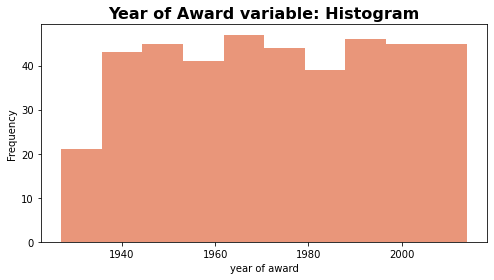

In [149]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Year of Award variable: Histogram',fontsize=16,fontweight='bold')
ax.set_xlabel('year of award')
oscars_short['year_of_award'].plot.hist(color='darksalmon', figsize=(8, 4))

plt.show()

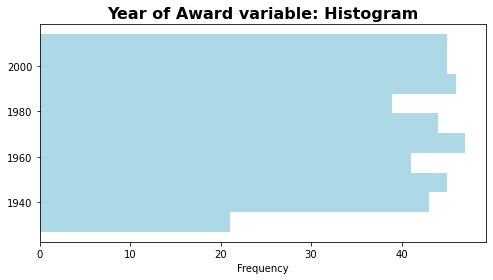

In [150]:
# the same, but horizontal
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Year of Award variable: Histogram',fontsize=16,fontweight='bold')
ax.set_xlabel('year of award')
oscars_short['year_of_award'].plot.hist(orientation='horizontal',color='lightblue', figsize=(8, 4))

plt.show()

### Density Plots

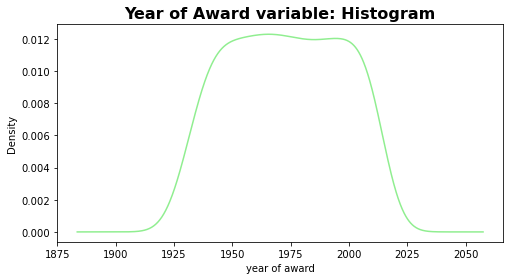

In [151]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Year of Award variable: Histogram',fontsize=16,fontweight='bold')
ax.set_xlabel('year of award')
oscars_short['year_of_award'].plot.kde(color='lightgreen', figsize=(8, 4))

plt.show()

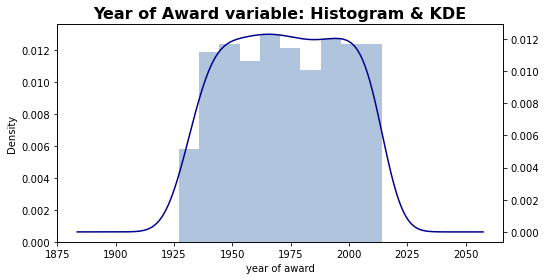

In [152]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Year of Award variable: Histogram & KDE',fontsize=16,fontweight='bold')
ax.set_xlabel('year of award')
oscars_short['year_of_award'].plot.hist(color='lightsteelblue', figsize=(8, 4), density=True)
oscars_short['year_of_award'].plot.kde(color='darkblue', ax=ax, secondary_y=True)

ax.set_ylabel('Density')
plt.show()


Text(0.5, 1.0, 'Other histogram & dencity plot')

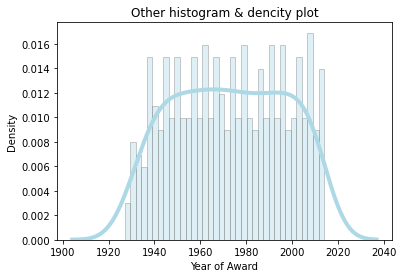

In [153]:
# Density Plot and Histogram using sns
sns.distplot(oscars_short['year_of_award'], hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

plt.xlabel('Year of Award')
plt.ylabel('Density')
plt.title('Other histogram & dencity plot')


### Bar Plot

In [154]:
oscars_per_person=oscars_short['person'].value_counts()
oscars_per_person

John Ford            4
Katharine Hepburn    4
Ingrid Bergman       3
Jack Nicholson       3
Frank Capra          3
                    ..
Sydney Pollack       1
George Roy Hill      1
Jo Van Fleet         1
Holly Hunter         1
Ethan Coen           1
Name: person, Length: 348, dtype: int64

In [155]:
type(oscars_per_person)

pandas.core.series.Series

In [156]:
oscars_per_person_df=oscars_per_person.to_frame()
oscars_per_person_df

,person
John Ford,4
Katharine Hepburn,4
Ingrid Bergman,3
Jack Nicholson,3
Frank Capra,3
...,...
Sydney Pollack,1
George Roy Hill,1
Jo Van Fleet,1
Holly Hunter,1


Text(0.5, 0, 'Name')

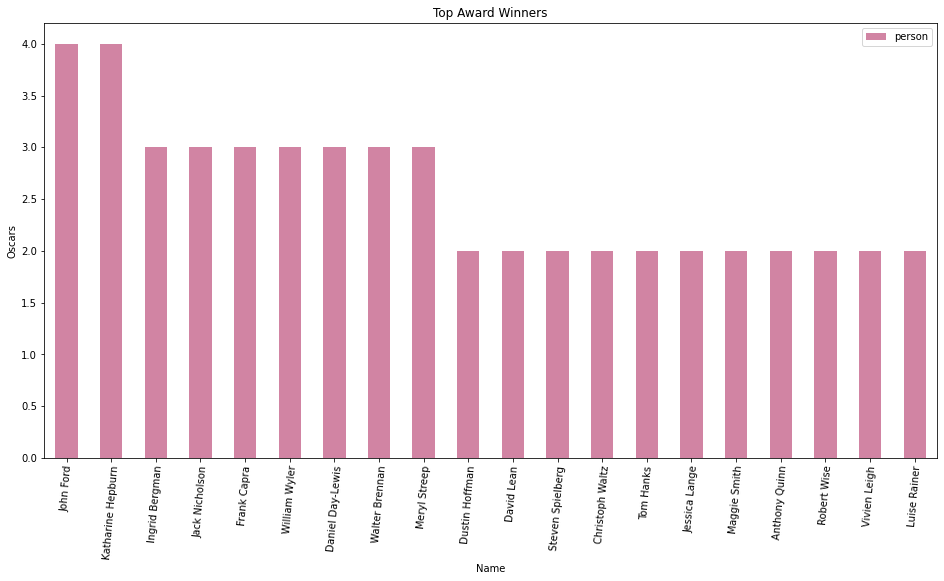

In [157]:
oscars_per_person_df.head(20).plot(kind='bar',figsize=(16,8),rot=85,title='Top Award Winners',color=(0.7, 0.2, 0.4, 0.6));
ax=plt.gca()
ax.set_ylabel('Oscars');
ax.set_xlabel('Name')

### Scatter Plot

In [158]:
oscars_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 415
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   birthplace          416 non-null    object        
 1   date_of_birth       415 non-null    datetime64[ns]
 2   race_ethnicity      416 non-null    object        
 3   religion            416 non-null    object        
 4   sexual_orientation  416 non-null    object        
 5   year_of_award       416 non-null    int64         
 6   award               416 non-null    object        
 7   movie               416 non-null    object        
 8   person              416 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 32.5+ KB


In [159]:
oscars_short['age_at_award']=oscars_short['year_of_award']-(oscars_short['date_of_birth'].dt.year)

In [160]:
oscars_short

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,32.0
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,44.0
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,36.0
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,33.0
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,39.0
...,...,...,...,...,...,...,...,...,...,...
411,"Woodlawn, Md",2067-12-11,Black,Na,Straight,2010,Best Supporting Actress,Precious,Mo'Nique,-57.0
412,New York City,2060-09-14,White,Na,Straight,2011,Best Supporting Actress,The Fighter,Melissa Leo,-49.0
413,"Montgomery, Al",1972-05-25,Black,Na,Na,2012,Best Supporting Actress,The Help,Octavia Spencer,40.0
414,"Brooklyn, Ny",1982-11-12,White,Christian,Straight,2013,Best Supporting Actress,Les MisÌ©rables,Anne Hathaway,31.0


In [161]:
(oscars_short['age_at_award']>0).value_counts()

False    316
True     100
Name: age_at_award, dtype: int64

In [162]:
from datetime import datetime
hundred_years=datetime.strptime('0100-01-01','%Y-%m-%d')
print(hundred_years)

0100-01-01 00:00:00


In [163]:
oscars_short['year_of_birth']=oscars_short.loc[:,'date_of_birth'].dt.year
oscars_short['age_at_award']=oscars_short['year_of_award']-(oscars_short['date_of_birth'].dt.year)
oscars_short.loc[oscars_short['age_at_award']<1,'year_of_birth'] = oscars_short.loc[oscars_short['age_at_award']<1,'year_of_birth'] - 100

In [164]:
oscars_short['age_at_award']=oscars_short['year_of_award']-(oscars_short['year_of_birth'])

In [165]:
oscars_short.loc[(oscars_short['age_at_award']<1),:]

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth


In [166]:
oscars_short

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,32.0,1895.0
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,44.0,1886.0
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,36.0,1895.0
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,33.0,1899.0
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,39.0,1894.0
...,...,...,...,...,...,...,...,...,...,...,...
411,"Woodlawn, Md",2067-12-11,Black,Na,Straight,2010,Best Supporting Actress,Precious,Mo'Nique,43.0,1967.0
412,New York City,2060-09-14,White,Na,Straight,2011,Best Supporting Actress,The Fighter,Melissa Leo,51.0,1960.0
413,"Montgomery, Al",1972-05-25,Black,Na,Na,2012,Best Supporting Actress,The Help,Octavia Spencer,40.0,1972.0
414,"Brooklyn, Ny",1982-11-12,White,Christian,Straight,2013,Best Supporting Actress,Les MisÌ©rables,Anne Hathaway,31.0,1982.0


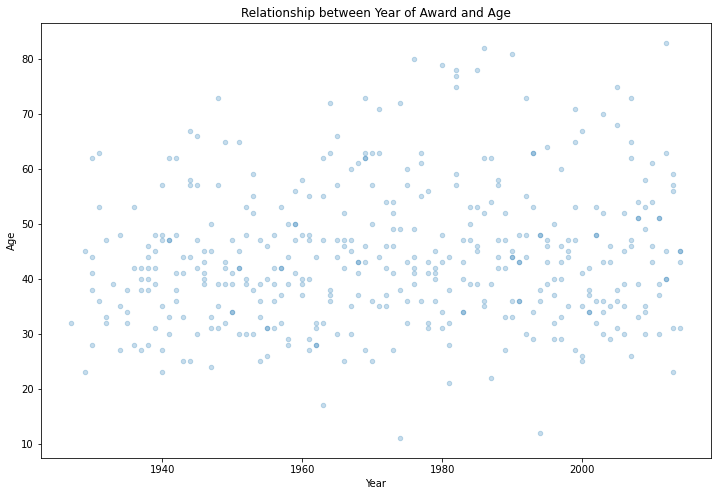

In [167]:
oscars_short.plot.scatter('year_of_award','age_at_award', title='Relationship between Year of Award and Age',alpha=0.25,figsize=(12,8));
ax=plt.gca()
ax.set_ylabel('Age')
ax.set_xlabel('Year');

In [168]:
oscars_short.corr()

,year_of_award,age_at_award,year_of_birth
year_of_award,1.000000,0.123459,0.875404
age_at_award,0.123459,1.000000,-0.371617
year_of_birth,0.875404,-0.371617,1.000000


Text(0, 0.5, 'Columns')

<Figure size 432x288 with 0 Axes>

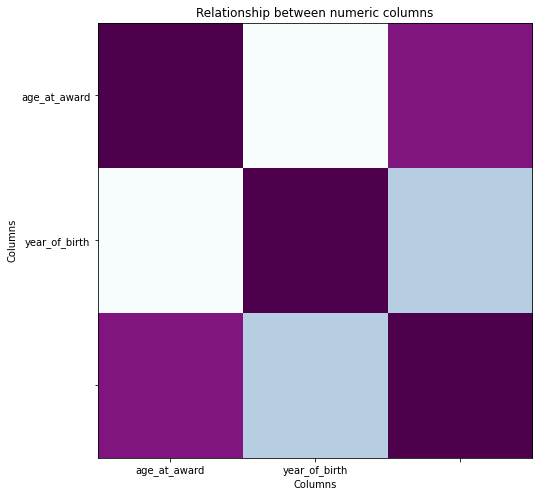

In [169]:
cor = oscars_short.corr().abs()

import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl



fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(8,8))
heatplot = ax.imshow(cor, cmap='BuPu')
ax.set_xticklabels(cor.columns)
ax.set_yticklabels(cor.index)

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title("Relationship between numeric columns")
ax.set_xlabel('Columns')
ax.set_ylabel('Columns')

#  
#  
#  
#  
##  Grouping for Aggregation, filtration and transformation

The most common use of a _groupby_ is performing an aggregation (which takes several values and converts them in one single value). 

In order to do this, we will define an __aggregating column__ (from where we take the value to aggregate) and an __aggregating function__ (how do we aggregate). 

Some common aggregating functions are _mean, sum, max, min, count_, etc...

The easiest way to do it, groupby + apply:

In [170]:
oscars_short 

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,32.0,1895.0
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,44.0,1886.0
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,36.0,1895.0
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,33.0,1899.0
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,39.0,1894.0
...,...,...,...,...,...,...,...,...,...,...,...
411,"Woodlawn, Md",2067-12-11,Black,Na,Straight,2010,Best Supporting Actress,Precious,Mo'Nique,43.0,1967.0
412,New York City,2060-09-14,White,Na,Straight,2011,Best Supporting Actress,The Fighter,Melissa Leo,51.0,1960.0
413,"Montgomery, Al",1972-05-25,Black,Na,Na,2012,Best Supporting Actress,The Help,Octavia Spencer,40.0,1972.0
414,"Brooklyn, Ny",1982-11-12,White,Christian,Straight,2013,Best Supporting Actress,Les MisÌ©rables,Anne Hathaway,31.0,1982.0


In [171]:
grouped=oscars_short.groupby(['award']).agg({'age_at_award':['mean','count']}) 
grouped

age_at_award      
                                mean count
award                                     
Best Actor                 45.046512    86
Best Actress               36.850575    87
Best Director              47.279070    86
Best Supporting Actor      50.666667    78
Best Supporting Actress    40.641026    78

In [172]:
grouped=oscars_short.groupby(['year_of_award']).agg({'age_at_award':['mean','count']}) 
grouped

age_at_award      
                      mean count
year_of_award                   
1927             32.000000     1
1929             34.000000     2
1930             42.600000     5
1931             50.666667     3
1932             37.333333     3
...                    ...   ...
2010             51.000000     4
2011             41.600000     5
2012             54.200000     5
2013             45.200000     5
2014             41.000000     4

[87 rows x 2 columns]

In [173]:
grouped.loc[grouped[('age_at_award','count')]>5,:].sort_values(('age_at_award','mean'),ascending=False).head(10)

age_at_award      
                      mean count
year_of_award                   
1969             53.714286     7
2007             53.166667     6
1976             49.166667     6
1990             47.166667     6
1973             44.833333     6
2003             44.166667     6
2009             43.166667     6
1997             41.833333     6
1961             41.000000     6
1938             39.666667     6

Text(0.5, 0, 'Category')

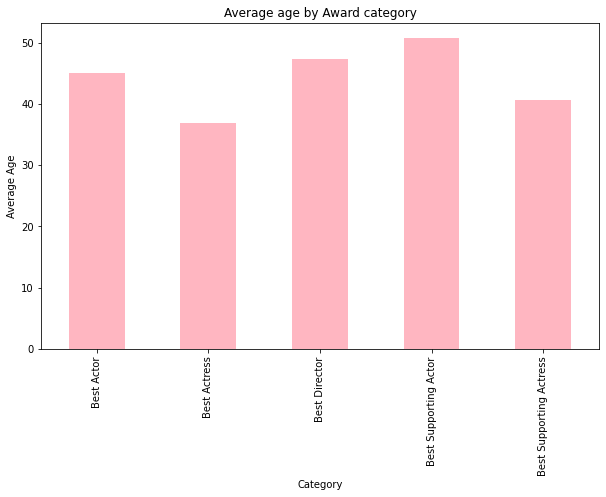

In [174]:
oscars_short.groupby('award').mean().loc[:,'age_at_award'].plot(kind='bar',title='Average age by Award category',linewidth=2,figsize=(10,6), color='lightpink');
ax=plt.gca()
ax.set_ylabel('Average Age');
ax.set_xlabel('Category')

In [175]:
grouped=oscars_short.groupby(['movie'])
grouped.head()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,32.0,1895.0
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,44.0,1886.0
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,36.0,1895.0
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,33.0,1899.0
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,39.0,1894.0
...,...,...,...,...,...,...,...,...,...,...,...
411,"Woodlawn, Md",2067-12-11,Black,Na,Straight,2010,Best Supporting Actress,Precious,Mo'Nique,43.0,1967.0
412,New York City,2060-09-14,White,Na,Straight,2011,Best Supporting Actress,The Fighter,Melissa Leo,51.0,1960.0
413,"Montgomery, Al",1972-05-25,Black,Na,Na,2012,Best Supporting Actress,The Help,Octavia Spencer,40.0,1972.0
414,"Brooklyn, Ny",1982-11-12,White,Christian,Straight,2013,Best Supporting Actress,Les MisÌ©rables,Anne Hathaway,31.0,1982.0


In [176]:
grouped.get_group('Cabaret')

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
46,"Chicago, Il",2027-06-23,White,Na,Straight,1973,Best Director,Cabaret,Bob Fosse,46.0,1927.0
209,"Cleveland, Oh",2032-04-11,White,Jewish,Gay,1973,Best Supporting Actor,Cabaret,Joel Grey,41.0,1932.0
296,"Los Angeles, Ca",2046-03-12,White,Na,Na,1973,Best Actress,Cabaret,Liza Minnelli,27.0,1946.0


#  
###  Grouping by multiple columns

In [177]:
grouped=oscars_short.groupby(['person','award']).size()
grouped

person          award                  
Adrien Brody    Best Actor                 1
Al Pacino       Best Actor                 1
Alan Arkin      Best Supporting Actor      1
Alec Guinness   Best Actor                 1
Alice Brady     Best Supporting Actress    1
                                          ..
William Holden  Best Actor                 1
William Hurt    Best Actor                 1
William Wyler   Best Director              3
Woody Allen     Best Director              1
Yul Brynner     Best Actor                 1
Length: 360, dtype: int64

In [178]:
grouped=oscars_short.groupby(['person','award']).size().sort_values(ascending=False)
grouped


person               award                  
Katharine Hepburn    Best Actress               4
John Ford            Best Director              4
William Wyler        Best Director              3
Frank Capra          Best Director              3
Daniel Day-Lewis     Best Actor                 3
                                               ..
Margaret Rutherford  Best Supporting Actress    1
Marie Dressler       Best Actress               1
Marion Cotillard     Best Actress               1
Marisa Tomei         Best Supporting Actress    1
Adrien Brody         Best Actor                 1
Length: 360, dtype: int64

In [179]:
grouped=oscars_short.groupby(['person','award']).size().nlargest(20)
grouped

person             award                  
John Ford          Best Director              4
Katharine Hepburn  Best Actress               4
Daniel Day-Lewis   Best Actor                 3
Frank Capra        Best Director              3
Walter Brennan     Best Supporting Actor      3
William Wyler      Best Director              3
Ang Lee            Best Director              2
Anthony Quinn      Best Supporting Actor      2
Bette Davis        Best Actress               2
Billy Wilder       Best Director              2
Christoph Waltz    Best Supporting Actor      2
Clint Eastwood     Best Director              2
David Lean         Best Director              2
Dianne Wiest       Best Supporting Actress    2
Dustin Hoffman     Best Actor                 2
Elia Kazan         Best Director              2
Elizabeth Taylor   Best Actress               2
Frank Lloyd        Best Director              2
Fred Zinnemann     Best Director              2
Gary Cooper        Best Actor                

In [180]:
#other alternative, without group by
oscars_short['person'].value_counts().nlargest(10)

John Ford            4
Katharine Hepburn    4
Ingrid Bergman       3
Jack Nicholson       3
Frank Capra          3
William Wyler        3
Daniel Day-Lewis     3
Walter Brennan       3
Meryl Streep         3
Dustin Hoffman       2
Name: person, dtype: int64

In [181]:
#other alternative, without group by
oscars_short['person'].value_counts().nsmallest(5)

James Coburn       1
Peter Finch        1
Faye Dunaway       1
Victor McLaglen    1
Woody Allen        1
Name: person, dtype: int64

If we want to create a dataframe, with the total number of elements per group (size), we can reset the index like following...

In [182]:
oscars_short_by_religion=oscars_short.groupby(['award','religion']).size()
oscars_short_by_religion=oscars_short_by_religion.reset_index()
oscars_short_by_religion
col_rename={0:'count_religion'}
oscars_short_by_religion=oscars_short_by_religion.rename(columns=col_rename)
oscars_short_by_religion

,award,religion,count_religion
0,Best Actor,Anglican/episcopalian,1
1,Best Actor,Atheist,2
2,Best Actor,Baptist,1
3,Best Actor,Born-Again Christian,2
4,Best Actor,Deist,3
5,Best Actor,Jewish,7
6,Best Actor,Lutheran,3
7,Best Actor,Na,44
8,Best Actor,Presbyterian,1
9,Best Actor,Protestant,3


#### As we saw before, we can apply more than one operation at the same time

In [183]:
grouped=oscars_short.groupby(['year_of_award']).agg({'age_at_award':['mean','count']}) 
grouped.head(5)

age_at_award      
                      mean count
year_of_award                   
1927             32.000000     1
1929             34.000000     2
1930             42.600000     5
1931             50.666667     3
1932             37.333333     3

####  We can even apply different operations to different columns

In [184]:
grouped=oscars_short.groupby(['year_of_award']).agg({'age_at_award':['mean','count'],'year_of_birth':'min','religion':['max','min']}) 
grouped.head(20)

age_at_award       year_of_birth        religion  \
                      mean count           min             max   
year_of_award                                                    
1927             32.000000     1        1895.0              Na   
1929             34.000000     2        1884.0              Na   
1930             42.600000     5        1868.0              Na   
1931             50.666667     3        1868.0  Roman Catholic   
1932             37.333333     3        1885.0              Na   
1933             39.000000     1        1894.0  Roman Catholic   
1934             36.666667     3        1886.0  Roman Catholic   
1935             34.666667     3        1897.0  Roman Catholic   
1936             41.000000     3        1883.0  Roman Catholic   
1937             36.750000     4        1895.0  Roman Catholic   
1938             39.666667     6        1892.0  Roman Catholic   
1939             41.000000     5        1891.0  Roman Catholic   
1940             39.500000     6        1883.0  Roman Catholic   
1941             43.800000     5        1879.0  Roman Catholic   
1942             45.000000     5        1880.0  Roman Catholic   
1943             35.750000     4        1899.0  Roman Catholic   
1944             50.200000     5        1877.0  Roman Catholic   
1945             48.400000     5        1879.0  Roman Catholic   
1946             41.600000     5        1901.0              Na   
1947             36.600000     5        1897.0              Na   

                                      
                                 min  
year_of_award                         
1927                              Na  
1929                              Na  
1930                              Na  
1931                              Na  
1932                              Na  
1933                  Roman Catholic  
1934                         Atheist  
1935                              Na  
1936           Anglican/episcopalian  
1937                          Jewish  
1938                          Jewish  
1939                              Na  
1940                       Christian  
1941               Christian Science  
1942                              Na  
1943                              Na  
1944                              Na  
1945                              Na  
1946               Christian Science  
1947                              Na

Inevitably, when using groupby, you will likely create a __MultiIndex__ in the columns or rows or both. DataFrames with MultiIndexes are more difficult to navigate and occasionally have confusing column names as well.

Doing this, we obtain a structure with two level of indexes. This difficults the access to the data.

Because of that we will try to simplify the structure.

Let's start by understanding how the index is presented at each level:

In [185]:
level0=grouped.columns.get_level_values(0)

In [186]:
level0

Index(['age_at_award', 'age_at_award', 'year_of_birth', 'religion',
       'religion'],
      dtype='object')

In [187]:
level1=grouped.columns.get_level_values(1)

In [188]:
level1

Index(['mean', 'count', 'min', 'max', 'min'], dtype='object')

We can see that we have two columns called min. We can only differenciate them by using both index levels (the sum of stars or the sum of reviews)

We will try to reduce this structure, by concatenating both levels in the same column name.

In [189]:
grouped.columns = level0 + '_' + level1

Doing this, we now have 5 different columns with one index level:

In [190]:
grouped

,age_at_award_mean,age_at_award_count,year_of_birth_min,religion_max,religion_min
year_of_award,,,,,
1927,32.000000,1,1895.0,Na,Na
1929,34.000000,2,1884.0,Na,Na
1930,42.600000,5,1868.0,Na,Na
1931,50.666667,3,1868.0,Roman Catholic,Na
1932,37.333333,3,1885.0,Na,Na
...,...,...,...,...,...
2010,51.000000,4,1949.0,Na,Lutheran
2011,41.600000,5,1960.0,Na,Jewish
2012,54.200000,5,1929.0,Na,Jewish


We can see that we still have 2 levels in the row index. We can reduce this using _reset_index()_

In [191]:
grouped.reset_index(inplace=True)

In [192]:
grouped

,year_of_award,age_at_award_mean,age_at_award_count,year_of_birth_min,religion_max,religion_min
0,1927,32.000000,1,1895.0,Na,Na
1,1929,34.000000,2,1884.0,Na,Na
2,1930,42.600000,5,1868.0,Na,Na
3,1931,50.666667,3,1868.0,Roman Catholic,Na
4,1932,37.333333,3,1885.0,Na,Na
...,...,...,...,...,...,...
82,2010,51.000000,4,1949.0,Na,Lutheran
83,2011,41.600000,5,1960.0,Na,Jewish
84,2012,54.200000,5,1929.0,Na,Jewish
85,2013,45.200000,5,1954.0,Na,Christian


Pandas also allows us to define our own aggregate functions:

In [193]:
def add_one(x):
    return x.mean()+1 
     
oscars_short.groupby('award').agg({'age_at_award': ['mean', add_one]})

age_at_award           
                                mean    add_one
award                                          
Best Actor                 45.046512  46.046512
Best Actress               36.850575  37.850575
Best Director              47.279070  48.279070
Best Supporting Actor      50.666667  51.666667
Best Supporting Actress    40.641026  41.641026

In [194]:
add_one.__name__='PlusOne'
grouped=oscars_short.groupby('award').agg({'age_at_award': ['mean', add_one]})
grouped

age_at_award           
                                mean    PlusOne
award                                          
Best Actor                 45.046512  46.046512
Best Actress               36.850575  37.850575
Best Director              47.279070  48.279070
Best Supporting Actor      50.666667  51.666667
Best Supporting Actress    40.641026  41.641026

In [195]:
grouped=oscars_short.groupby('award')
print(type(grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [196]:
grouped.ngroups

5

In [197]:
grouped.get_group('Best Actor')

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
87,"Rorschach, Switzerland",1884-07-23,White,Na,Bisexual,1929,Best Actor,The Last Command,Emil Jannings,45.0,1884.0
88,"Columbus, Oh",1889-03-29,White,Na,Straight,1930,Best Actor,In Old Arizona,Warner Baxter,41.0,1889.0
89,"London, England",1868-04-10,White,Na,Straight,1930,Best Actor,Desraeli,George Arliss,62.0,1868.0
90,"Philadelphia, Pa",1878-04-28,White,Roman Catholic,Straight,1931,Best Actor,A Free Soul,Lionel Barrymore,53.0,1878.0
91,"Kansas City, Mo",1885-04-01,White,Na,Straight,1932,Best Actor,The Champ,Wallace Beery,47.0,1885.0
...,...,...,...,...,...,...,...,...,...,...,...
168,"Los Angeles, Ca",2049-12-04,White,Lutheran,Straight,2010,Best Actor,Crazy Heart,Jeff Bridges,61.0,1949.0
169,"Grayshott, Hampshire, England",2060-09-10,White,Na,Straight,2011,Best Actor,The King's Speech,Colin Firth,51.0,1960.0
170,"Rueil-Malmaison, Hauts-De-Seine, France",1972-06-19,White,Na,Straight,2012,Best Actor,The Artist,Jean Dujardin,40.0,1972.0
171,"London, England",2057-04-29,White,Na,Straight,2013,Best Actor,Lincoln,Daniel Day-Lewis,56.0,1957.0


In [198]:
from IPython.display import display

for name, group in grouped:
        print(name)
        display(group.head(3))

Best Actor


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
87,"Rorschach, Switzerland",1884-07-23,White,Na,Bisexual,1929,Best Actor,The Last Command,Emil Jannings,45.0,1884.0
88,"Columbus, Oh",1889-03-29,White,Na,Straight,1930,Best Actor,In Old Arizona,Warner Baxter,41.0,1889.0
89,"London, England",1868-04-10,White,Na,Straight,1930,Best Actor,Desraeli,George Arliss,62.0,1868.0


Best Actress


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
251,"Philadelphia, Pa",2006-10-06,White,Na,Straight,1929,Best Actress,7th Heaven,Janet Gaynor,23.0,1906.0
252,"Toronto, Ontario, Canada",1892-04-08,White,Na,Straight,1930,Best Actress,Coquette,Mary Pickford,38.0,1892.0
253,"Montreal, Quebec, Canada",1902-08-10,White,Na,Straight,1930,Best Actress,The Divorcee,Norma Shearer,28.0,1902.0


Best Director


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,32.0,1895.0
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,44.0,1886.0
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,36.0,1895.0


Best Supporting Actor


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
173,"Swampscott, Ma",1894-07-25,White,Na,Straight,1938,Best Supporting Actor,Come and Get It,Walter Brennan,44.0,1894.0
174,"Vienna, Austria",1896-03-22,White,Na,Straight,1938,Best Supporting Actor,The Life of Emile Zola,Joseph Schildkraut,42.0,1896.0
175,"Swampscott, Ma",1894-07-25,White,Na,Straight,1939,Best Supporting Actor,Kentucky,Walter Brennan,45.0,1894.0


Best Supporting Actress


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
338,"Litchfield, Mn",1899-02-15,White,Na,Straight,1937,Best Supporting Actress,Anthony Adverse,Gale Sondergaard,38.0,1899.0
339,New York City,1892-11-02,White,Na,Straight,1938,Best Supporting Actress,In Old Chicago,Alice Brady,46.0,1892.0
340,"Los Angeles, Ca",1891-12-07,White,Na,Straight,1939,Best Supporting Actress,Jezebel,Fay Bainter,48.0,1891.0


In [199]:
grouped['race_ethnicity'].max()

award
Best Actor                 White
Best Actress               White
Best Director              White
Best Supporting Actor      White
Best Supporting Actress    White
Name: race_ethnicity, dtype: object

In [200]:
for age_at_award, group in grouped:
        print(age_at_award)
        display(group.sort_values('age_at_award',ascending=False).head(3))

Best Actor


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
140,"Grand Island, Ne",2005-05-16,White,Na,Straight,1982,Best Actor,On Golden Pond,Henry Fonda,77.0,1905.0
128,"Winterset, Ia",2007-05-26,White,Roman Catholic,Straight,1970,Best Actor,True Grit,John Wayne,63.0,1907.0
89,"London, England",1868-04-10,White,Na,Straight,1930,Best Actor,Desraeli,George Arliss,62.0,1868.0


Best Actress


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
313,"London, England",2009-06-07,White,Na,Straight,1990,Best Actress,Driving Miss Daisy,Jessica Tandy,81.0,1909.0
305,"Hartford, Ct",2007-05-12,White,Atheist,Bisexual,1982,Best Actress,On Golden Pond,Katharine Hepburn,75.0,1907.0
335,"Summit, Nj",2049-06-22,White,Na,Straight,2012,Best Actress,The Iron Lady,Meryl Streep,63.0,1949.0


Best Director


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
78,"San Francisco, Ca",2030-05-31,White,Na,Straight,2005,Best Director,Million Dollar Baby,Clint Eastwood,75.0,1930.0
76,"Paris, France",2033-08-18,White,See Note,Straight,2003,Best Director,The Pianist,Roman Polanski,70.0,1933.0
37,New York City,1899-07-07,White,Na,Gay,1965,Best Director,My Fair Lady,George Cukor,66.0,1899.0


Best Supporting Actor


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
248,"Toronto, Ontario, Canada",2029-12-13,White,Na,Straight,2012,Best Supporting Actor,Beginning,Christopher Plummer,83.0,1929.0
222,"Kenosha, Wi",2004-05-31,White,Roman Catholic,Straight,1986,Best Supporting Actor,Cocoon,Don Ameche,82.0,1904.0
212,New York City,1896-01-20,White,Jewish,Straight,1976,Best Supporting Actor,The Sunshine Boys,George Burns,80.0,1896.0


Best Supporting Actress


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
386,"Croydon, Surrey, England",2007-12-22,White,Agnostic,Straight,1985,Best Supporting Actress,A Passage to India,Peggy Ashcroft,78.0,1907.0
370,"Quincy, Ma",1896-10-30,White,Na,Straight,1969,Best Supporting Actress,Rosemary's Baby,Ruth Gordon,73.0,1896.0
365,"London, England",1892-05-11,White,Na,Straight,1964,Best Supporting Actress,the V.I.P.s,Margaret Rutherford,72.0,1892.0



#  
###  Transform
#   

In [201]:
oscars_short.head(3)

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,32.0,1895.0
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,44.0,1886.0
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,36.0,1895.0


In [202]:
grouped=oscars_short.groupby('award')
grouped['age_at_award'].mean()

award
Best Actor                 45.046512
Best Actress               36.850575
Best Director              47.279070
Best Supporting Actor      50.666667
Best Supporting Actress    40.641026
Name: age_at_award, dtype: float64

In [203]:
grouped['age_at_award'].transform('mean').head(20)

0     47.27907
1     47.27907
2     47.27907
3     47.27907
4     47.27907
5     47.27907
6     47.27907
7     47.27907
8     47.27907
9     47.27907
10    47.27907
11    47.27907
12    47.27907
13    47.27907
14    47.27907
15    47.27907
16    47.27907
17    47.27907
18    47.27907
19    47.27907
Name: age_at_award, dtype: float64

In [204]:
oscars_short['avg_age_at_award'] = oscars_short.groupby('award')['age_at_award'].transform('mean')
oscars_short['is_above_avg_age'] = oscars_short['avg_age_at_award'] < oscars_short['age_at_award']

In [205]:
oscars_short.head(20)

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth,avg_age_at_award,is_above_avg_age
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,32.0,1895.0,47.27907,False
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,44.0,1886.0,47.27907,False
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,36.0,1895.0,47.27907,False
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,33.0,1899.0,47.27907,False
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,39.0,1894.0,47.27907,False
5,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1934,Best Director,Cavalcade,Frank Lloyd,48.0,1886.0,47.27907,True
6,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1935,Best Director,It Happened One Night,Frank Capra,38.0,1897.0,47.27907,False
7,"Cape Elizabeth, Me",1894-02-01,White,Roman Catholic,Bisexual,1936,Best Director,The Informer,John Ford,42.0,1894.0,47.27907,False
8,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1937,Best Director,Mr. Deeds Goes to Town,Frank Capra,40.0,1897.0,47.27907,False
9,"Los Angeles, Ca",1898-10-03,White,Na,Straight,1938,Best Director,The Awful Truth,Leo McCarey,40.0,1898.0,47.27907,False


Transform can also be used to do transformations to a dataframe, in combination with apply

In [206]:
#Let´s imagine we want to add 1 to the year of birth (just to see how to do it)
oscars_short['year_of_birth'].transform(func = lambda x : x + 1)

0      1896.0
1      1887.0
2      1896.0
3      1900.0
4      1895.0
        ...  
411    1968.0
412    1961.0
413    1973.0
414    1983.0
415    1984.0
Name: year_of_birth, Length: 416, dtype: float64

We can then assign this serie to the old year_of_birth column, or to a new one.

Transform comes in handy during feature extraction. It can replace groupby + merge operation, all in one.

#  
#   
#   
#   
# Combining Pandas Objects
#   
To do this, we will work with _append, concat, join_ and _merge_

The first one we will use is append, which allows us to add one or more rows to a dataframe. We can manually add one row at a time with .loc, but we will be able to add several rows (or even indicate them with a second df) using append

In [207]:
oscars_short_BestActress=oscars_short.loc[oscars_short['award'].str.contains('Best Actress'),:]
oscars_short_BestActor=oscars_short.loc[oscars_short['award'].str.contains('Best Actor'),:]

In [208]:
oscars_short_BestActress.head()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth,avg_age_at_award,is_above_avg_age
251,"Philadelphia, Pa",2006-10-06,White,Na,Straight,1929,Best Actress,7th Heaven,Janet Gaynor,23.0,1906.0,36.850575,False
252,"Toronto, Ontario, Canada",1892-04-08,White,Na,Straight,1930,Best Actress,Coquette,Mary Pickford,38.0,1892.0,36.850575,True
253,"Montreal, Quebec, Canada",1902-08-10,White,Na,Straight,1930,Best Actress,The Divorcee,Norma Shearer,28.0,1902.0,36.850575,False
254,"Cobourg, Ontario, Canada",1868-11-02,White,Na,Straight,1931,Best Actress,Min and Bill,Marie Dressler,63.0,1868.0,36.850575,True
255,"Washington, Dc",1900-10-10,White,Na,Straight,1932,Best Actress,The Sin of Madelon Claudet,Helen Hayes,32.0,1900.0,36.850575,False


In [209]:
oscars_short_BestActor.head()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth,avg_age_at_award,is_above_avg_age
87,"Rorschach, Switzerland",1884-07-23,White,Na,Bisexual,1929,Best Actor,The Last Command,Emil Jannings,45.0,1884.0,45.046512,False
88,"Columbus, Oh",1889-03-29,White,Na,Straight,1930,Best Actor,In Old Arizona,Warner Baxter,41.0,1889.0,45.046512,False
89,"London, England",1868-04-10,White,Na,Straight,1930,Best Actor,Desraeli,George Arliss,62.0,1868.0,45.046512,True
90,"Philadelphia, Pa",1878-04-28,White,Roman Catholic,Straight,1931,Best Actor,A Free Soul,Lionel Barrymore,53.0,1878.0,45.046512,True
91,"Kansas City, Mo",1885-04-01,White,Na,Straight,1932,Best Actor,The Champ,Wallace Beery,47.0,1885.0,45.046512,True


In [210]:
oscars_short_Best_ActorandActress=oscars_short_BestActor.append(oscars_short_BestActress)

In [211]:
oscars_short_Best_ActorandActress

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth,avg_age_at_award,is_above_avg_age
87,"Rorschach, Switzerland",1884-07-23,White,Na,Bisexual,1929,Best Actor,The Last Command,Emil Jannings,45.0,1884.0,45.046512,False
88,"Columbus, Oh",1889-03-29,White,Na,Straight,1930,Best Actor,In Old Arizona,Warner Baxter,41.0,1889.0,45.046512,False
89,"London, England",1868-04-10,White,Na,Straight,1930,Best Actor,Desraeli,George Arliss,62.0,1868.0,45.046512,True
90,"Philadelphia, Pa",1878-04-28,White,Roman Catholic,Straight,1931,Best Actor,A Free Soul,Lionel Barrymore,53.0,1878.0,45.046512,True
91,"Kansas City, Mo",1885-04-01,White,Na,Straight,1932,Best Actor,The Champ,Wallace Beery,47.0,1885.0,45.046512,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,"Arlington, Va",2064-07-26,White,Na,Straight,2010,Best Actress,The Blind Side,Sandra Bullock,46.0,1964.0,36.850575,True
334,"Jerusalem, Israel",1981-06-09,White,Jewish,Straight,2011,Best Actress,Black Swan,Natalie Portman,30.0,1981.0,36.850575,False
335,"Summit, Nj",2049-06-22,White,Na,Straight,2012,Best Actress,The Iron Lady,Meryl Streep,63.0,1949.0,36.850575,True
336,"Louisville, Ky",1990-08-15,White,Na,Na,2013,Best Actress,Silver Linings Playbook,Jennifer Lawrence,23.0,1990.0,36.850575,False


In [212]:
len(oscars_short_BestActor)

86

In [213]:
len(oscars_short_BestActress)

87

In [214]:
86+87

173

### Concat

We will see how to do the same (and more) using concat

In [215]:
oscars_short_BestActress.head()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth,avg_age_at_award,is_above_avg_age
251,"Philadelphia, Pa",2006-10-06,White,Na,Straight,1929,Best Actress,7th Heaven,Janet Gaynor,23.0,1906.0,36.850575,False
252,"Toronto, Ontario, Canada",1892-04-08,White,Na,Straight,1930,Best Actress,Coquette,Mary Pickford,38.0,1892.0,36.850575,True
253,"Montreal, Quebec, Canada",1902-08-10,White,Na,Straight,1930,Best Actress,The Divorcee,Norma Shearer,28.0,1902.0,36.850575,False
254,"Cobourg, Ontario, Canada",1868-11-02,White,Na,Straight,1931,Best Actress,Min and Bill,Marie Dressler,63.0,1868.0,36.850575,True
255,"Washington, Dc",1900-10-10,White,Na,Straight,1932,Best Actress,The Sin of Madelon Claudet,Helen Hayes,32.0,1900.0,36.850575,False


In [216]:
oscars_short_Best_ActorandActress_concat=pd.concat([oscars_short_BestActor,oscars_short_BestActress])

In [217]:
oscars_short_Best_ActorandActress_concat

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth,avg_age_at_award,is_above_avg_age
87,"Rorschach, Switzerland",1884-07-23,White,Na,Bisexual,1929,Best Actor,The Last Command,Emil Jannings,45.0,1884.0,45.046512,False
88,"Columbus, Oh",1889-03-29,White,Na,Straight,1930,Best Actor,In Old Arizona,Warner Baxter,41.0,1889.0,45.046512,False
89,"London, England",1868-04-10,White,Na,Straight,1930,Best Actor,Desraeli,George Arliss,62.0,1868.0,45.046512,True
90,"Philadelphia, Pa",1878-04-28,White,Roman Catholic,Straight,1931,Best Actor,A Free Soul,Lionel Barrymore,53.0,1878.0,45.046512,True
91,"Kansas City, Mo",1885-04-01,White,Na,Straight,1932,Best Actor,The Champ,Wallace Beery,47.0,1885.0,45.046512,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,"Arlington, Va",2064-07-26,White,Na,Straight,2010,Best Actress,The Blind Side,Sandra Bullock,46.0,1964.0,36.850575,True
334,"Jerusalem, Israel",1981-06-09,White,Jewish,Straight,2011,Best Actress,Black Swan,Natalie Portman,30.0,1981.0,36.850575,False
335,"Summit, Nj",2049-06-22,White,Na,Straight,2012,Best Actress,The Iron Lady,Meryl Streep,63.0,1949.0,36.850575,True
336,"Louisville, Ky",1990-08-15,White,Na,Na,2013,Best Actress,Silver Linings Playbook,Jennifer Lawrence,23.0,1990.0,36.850575,False


![](Data/Yelp/join-or-merge-in-python-pandas-1.png)

In [218]:
grouped=oscars_short.groupby(['year_of_award']).agg({'age_at_award':['mean','count']})
level0=grouped.columns.get_level_values(0)
level1=grouped.columns.get_level_values(1)
grouped.columns = level0 + '_' + level1
grouped.reset_index(inplace=True) 

In [219]:
grouped

,year_of_award,age_at_award_mean,age_at_award_count
0,1927,32.000000,1
1,1929,34.000000,2
2,1930,42.600000,5
3,1931,50.666667,3
4,1932,37.333333,3
...,...,...,...
82,2010,51.000000,4
83,2011,41.600000,5
84,2012,54.200000,5
85,2013,45.200000,5


As we want the records of both dataframes, we will use outer join

In [220]:
oscars_short_perYear=oscars_short.merge(grouped, left_on='year_of_award', right_on='year_of_award',how='outer')

In [221]:
oscars_short_perYear.head()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth,avg_age_at_award,is_above_avg_age,age_at_award_mean,age_at_award_count
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,32.0,1895.0,47.279070,False,32.0,1
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,44.0,1886.0,47.279070,False,42.6,5
2,"Columbus, Oh",1889-03-29,White,Na,Straight,1930,Best Actor,In Old Arizona,Warner Baxter,41.0,1889.0,45.046512,False,42.6,5
3,"London, England",1868-04-10,White,Na,Straight,1930,Best Actor,Desraeli,George Arliss,62.0,1868.0,45.046512,True,42.6,5
4,"Toronto, Ontario, Canada",1892-04-08,White,Na,Straight,1930,Best Actress,Coquette,Mary Pickford,38.0,1892.0,36.850575,True,42.6,5


If we want to obtain only the awards for the years when the average age was less than 40 we can do...

In [222]:
year_less_than_40=grouped.loc[grouped['age_at_award_mean']<40,:]

In [223]:
year_less_than_40

,year_of_award,age_at_award_mean,age_at_award_count
0,1927,32.000000,1
1,1929,34.000000,2
4,1932,37.333333,3
5,1933,39.000000,1
6,1934,36.666667,3
7,1935,34.666667,3
9,1937,36.750000,4
10,1938,39.666667,6
12,1940,39.500000,6
15,1943,35.750000,4


Merge operation, by default is inner 

In [224]:
oscars_short.merge(year_less_than_40, left_on='year_of_award', right_on='year_of_award')

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth,avg_age_at_award,is_above_avg_age,age_at_award_mean,age_at_award_count
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,32.0,1895.0,47.279070,False,32.000000,1
1,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,33.0,1899.0,47.279070,False,37.333333,3
2,"Kansas City, Mo",1885-04-01,White,Na,Straight,1932,Best Actor,The Champ,Wallace Beery,47.0,1885.0,45.046512,True,37.333333,3
3,"Washington, Dc",1900-10-10,White,Na,Straight,1932,Best Actress,The Sin of Madelon Claudet,Helen Hayes,32.0,1900.0,36.850575,False,37.333333,3
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,39.0,1894.0,47.279070,False,39.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,"West Covina, Ca",2058-10-16,White,Roman Catholic,Straight,2004,Best Supporting Actor,Mystic River,Tim Robbins,46.0,1958.0,50.666667,False,38.250000,4
98,"Benoni, South Africa",1975-08-07,White,Na,Straight,2004,Best Actress,Monster,Charlize Theron,29.0,1975.0,36.850575,False,38.250000,4
99,"Katy, Tx",2069-04-25,White,Na,Straight,2004,Best Supporting Actress,Cold Mountain,RenÌ©e Zellweger,35.0,1969.0,40.641026,False,38.250000,4
100,"Rorschach, Switzerland",1884-07-23,White,Na,Bisexual,1929,Best Actor,The Last Command,Emil Jannings,45.0,1884.0,45.046512,False,34.000000,2
